In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import librosa
import random
import shutil
import optuna
import os

from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from pydub import AudioSegment
from PIL import Image

<H1>Spotify 3-Sec Dataset</H1>

In [87]:
#Load dataset into training/validation/testing at 80-10-10

train_dir = "dataset/training/"
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (515, 389), color_mode = "rgb", class_mode = "categorical", batch_size = 32, seed = 767)

validation_dir = "dataset/validation/"
vali_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
vali_generator = vali_datagen.flow_from_directory(validation_dir, target_size = (515, 389), color_mode = "rgb", class_mode = "categorical", batch_size = 32, seed = 767)

testing_dir = "dataset/testing/"
testing_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
testing_generator = vali_datagen.flow_from_directory(testing_dir, target_size = (515, 389), color_mode = "rgb", class_mode = "categorical", shuffle = False, batch_size = 32, seed = 767)

Found 35840 images belonging to 14 classes.
Found 4480 images belonging to 14 classes.
Found 4480 images belonging to 14 classes.


<H1>Spotify 9-Sec Dataset</H1>

In [59]:
#Load dataset into training/validation/testing at 80-10-10

train_dir = "9_sec_dataset/training/"
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (515, 389), color_mode = "rgb", class_mode = "categorical", batch_size = 32, seed = 767)

validation_dir = "9_sec_dataset/validation/"
vali_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
vali_generator = vali_datagen.flow_from_directory(validation_dir, target_size = (515, 389), color_mode = "rgb", class_mode = "categorical", batch_size = 32, seed = 767)

testing_dir = "9_sec_dataset/testing/"
testing_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
testing_generator = vali_datagen.flow_from_directory(testing_dir, target_size = (515, 389), color_mode = "rgb", class_mode = "categorical", shuffle = False, batch_size = 32, seed = 767)

Found 11200 images belonging to 14 classes.
Found 1400 images belonging to 14 classes.
Found 1400 images belonging to 14 classes.


<H1>Custom GTZAN + Rap, Brazilian Funk Dataset</H1>

In [ ]:
#Load dataset into training/validation/testing at 80-10-10

train_dir = "custom_dataset/training/"
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (515, 389), color_mode = "rgb", class_mode = "categorical", batch_size = 32, seed = 767)

validation_dir = "custom_dataset/validation/"
vali_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
vali_generator = vali_datagen.flow_from_directory(validation_dir, target_size = (515, 389), color_mode = "rgb", class_mode = "categorical", batch_size = 32, seed = 767)

testing_dir = "custom_dataset/testing/"
testing_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
testing_generator = vali_datagen.flow_from_directory(testing_dir, target_size = (515, 389), color_mode = "rgb", class_mode = "categorical", shuffle = False, batch_size = 32, seed = 767)

<H1>GTZAN Dataset</H1>

In [ ]:
#Load dataset into training/validation/testing at 80-10-10

train_dir = "original_dataset/training/"
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (515, 389), color_mode = "rgb", class_mode = "categorical", batch_size = 32, seed = 767)

validation_dir = "original_dataset/validation/"
vali_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
vali_generator = vali_datagen.flow_from_directory(validation_dir, target_size = (515, 389), color_mode = "rgb", class_mode = "categorical", batch_size = 32, seed = 767)

testing_dir = "original_dataset/testing/"
testing_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
testing_generator = vali_datagen.flow_from_directory(testing_dir, target_size = (515, 389), color_mode = "rgb", class_mode = "categorical", shuffle = False, batch_size = 32, seed = 767)

In [88]:
#Number of genres
n_classes = len(list(train_generator.class_indices.keys()))

<H1>Load Models</H1>

In [ ]:
model = tf.keras.models.load_model("GTZAN_Dataset_Model.h5")

In [ ]:
model = tf.keras.models.load_model("Custom_GTZAN_Model.h5")

In [89]:
model = tf.keras.models.load_model("Final_Model.h5")

In [ ]:
model = tf.keras.models.load_model("Final_Model_9_Sec.h5")

<H1>Custom Functions</H1>

In [80]:
def precision_per_class(model, testing_generator):
    predictions = model.predict(testing_generator)
    y_pred = np.argmax(predictions, axis = 1)
    true_classes = testing_generator.classes
    class_labels = list(testing_generator.class_indices.keys())   
    report = classification_report(true_classes, y_pred, target_names = class_labels)
    print(report)   
    
def multiclass_confusion_matrix(model, testing_generator):
    predictions = model.predict(testing_generator)
    y_pred = np.argmax(predictions, axis = 1)
    true_classes = testing_generator.classes
    class_labels = list(testing_generator.class_indices.keys())   
    report = confusion_matrix(true_classes, y_pred)
    plt.figure(figsize = (12, 9))
    ax = plt.axes()
    plt.tick_params(axis = "both", which = "both", labelsize = 10, labelbottom = False, bottom = False, top = True, labeltop = True)
    sns.heatmap(report, linewidths = 1, ax = ax, annot = True, fmt = "g", cmap = "Greens", xticklabels = class_labels, yticklabels = class_labels)
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")
    ax.xaxis.set_label_position("top")
    
def process_wav(song):
    name, ext = os.path.splitext(song)
    sound = AudioSegment.from_wav(song)
    
    #Stereo to Mono like original dataset
    sound = sound.set_channels(1)
    
    #Change Hz to 22050Hz like original dataset
    sound = sound.set_frame_rate(22050)
    
    sound.export("{0}_resampled.wav".format(name), format = "wav")
    
    song = "{0}_resampled.wav".format(name)
    
    i = 0
    to_return = []
    
    total_duration = len(AudioSegment.from_wav(song))
    
    intervals =  int(total_duration / 3000)
    
    for w in range(0, intervals):
        i = i + 1
        t1 = 3 * (w) * 1000
        t2 = 3 * (w + 1) * 1000
        newAudio = AudioSegment.from_wav(song)
        new = newAudio[t1:t2]
        new.export(str(w) + ".wav", format = "wav")
        to_return.append(str(w) + ".wav")
        
    return to_return, intervals

def generate_spectogram_for_song(song):
    x, sr = librosa.load(song, sr = None)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr = sr, x_axis = "time", y_axis = "log")
    plt.axis("off")
    plt.savefig(song.replace(".wav", ".jpg"), bbox_inches = "tight")
    plt.cla()
    
    return song.replace(".wav", ".jpg")
    
def test_song(song, model):
    name, ext = os.path.splitext(song)
    to_delete, intervals = process_wav(song)
    files_to_delete = ["{0}_resampled.wav".format(name)]
    files_to_delete = files_to_delete + to_delete
    
    probabilities = np.zeros(len(list(train_generator.class_indices.keys())))
    
    images_to_delete = []
    
    for mini_part in files_to_delete:
        spectogram = generate_spectogram_for_song(mini_part)
        images_to_delete.append(spectogram)
        image = Image.open(spectogram)
        im_arr = np.frombuffer(image.tobytes(), dtype = np.uint8)
        im_arr = im_arr.reshape((image.size[0], image.size[1], 3))                                   
        image = im_arr / 255.0  #Normalize the image
        image = np.expand_dims(image, axis = 0)
        random_test = image
        y_proba = model.predict(random_test, verbose = 0)
        np.set_printoptions(suppress = True) 
        probabilities = probabilities + y_proba[0]
        
    files_to_delete = files_to_delete + images_to_delete   
    for file_to_delete in files_to_delete:
        os.remove(file_to_delete)
    
    hexadecimal_alphabets = "0123456789ABCDEF"

    colors = ["#" + "".join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(9)]
    
    plt.clf()

    fig = plt.figure(figsize = (10, 5))

    # Create the bar plot with random colors for each
    plt.bar(list(train_generator.class_indices.keys()), probabilities / intervals, color = colors, width = 0.4)

    plt.xlabel("Genres")
    plt.ylabel("Probability")
    plt.title("Model prediction for the song {}".format(song.replace(".wav", "")))
    plt.show()
    
    return probabilities / intervals

def piecewise(epoch, lr):
    if epoch < 5:
        return lr
    elif epoch < 15:
        return lr * 0.5
    elif epoch < 20:
        return lr * 0.5
    else:
        return lr * 0.5

<H1>Final Model (100 Epochs)</H1>

In [5]:
#Main model - BatchNormalization + 5x5

#Best hyper-parameters with Optuna (lr = 0.0015, dropout = 0.2)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (5, 5), input_shape = (515, 389, 3)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (5, 5)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (5, 5)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (5, 5)),
    tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (5, 5)),
    tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_classes, activation = "softmax")
])

#Callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.8, patience = 1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 10)

model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.0015), metrics = ["accuracy"])
history = model.fit(train_generator, epochs = 100, validation_data = vali_generator, callbacks = [reduce_lr, early_stopping])

Metal device set to: Apple M2 Max
Epoch 1/100


2023-05-05 10:19:41.229933: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1120/1120 [==============================] - 101s 90ms/step - loss: 2.0041 - accuracy: 0.3938 - val_loss: 1.6212 - val_accuracy: 0.4634 - lr: 0.0015
Epoch 2/100
1120/1120 [==============================] - 100s 89ms/step - loss: 1.2775 - accuracy: 0.5857 - val_loss: 1.6667 - val_accuracy: 0.4911 - lr: 0.0015
Epoch 3/100
1120/1120 [==============================] - 100s 89ms/step - loss: 1.0463 - accuracy: 0.6619 - val_loss: 1.0486 - val_accuracy: 0.6451 - lr: 0.0015
Epoch 4/100
1120/1120 [==============================] - 99s 89ms/step - loss: 0.8679 - accuracy: 0.7158 - val_loss: 0.9164 - val_accuracy: 0.6969 - lr: 0.0015
Epoch 5/100
1120/1120 [==============================] - 100s 90ms/step - loss: 0.7252 - accuracy: 0.7653 - val_loss: 1.1171 - val_accuracy: 0.6455 - lr: 0.0015
Epoch 6/100
1120/1120 [==============================] - 100s 89ms/step - loss: 0.5487 - accuracy: 0.8209 - val_loss: 1.5723 - val_accuracy: 0.5446 - lr: 0.0012
Epoch 7/100
1120/1120 [========================

In [62]:
#We save the model
model.save("Final_Model.h5")

<H1>Final Model (100 Epochs) for 9-Sec Dataset</H1>

In [61]:
#Main model - BatchNormalization + 5x5

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (5, 5), input_shape = (515, 389, 3)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (5, 5)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (5, 5)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (5, 5)),
    tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (5, 5)),
    tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_classes, activation = "softmax")
])

#Callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.8, patience = 1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 10)

model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.0015), metrics = ["accuracy"])
history = model.fit(train_generator, epochs = 100, validation_data = vali_generator, callbacks = [reduce_lr, early_stopping])

Epoch 1/100
350/350 [==============================] - 35s 97ms/step - loss: 2.9175 - accuracy: 0.2464 - val_loss: 2.8214 - val_accuracy: 0.2007 - lr: 0.0015
Epoch 2/100
350/350 [==============================] - 34s 96ms/step - loss: 1.6854 - accuracy: 0.4514 - val_loss: 2.5186 - val_accuracy: 0.3043 - lr: 0.0015
Epoch 3/100
350/350 [==============================] - 33s 94ms/step - loss: 1.3906 - accuracy: 0.5466 - val_loss: 2.2433 - val_accuracy: 0.3521 - lr: 0.0015
Epoch 4/100
350/350 [==============================] - 33s 94ms/step - loss: 1.1990 - accuracy: 0.6062 - val_loss: 1.5704 - val_accuracy: 0.4871 - lr: 0.0015
Epoch 5/100
350/350 [==============================] - 33s 95ms/step - loss: 1.0481 - accuracy: 0.6561 - val_loss: 1.4765 - val_accuracy: 0.5064 - lr: 0.0015
Epoch 6/100
350/350 [==============================] - 33s 94ms/step - loss: 0.9281 - accuracy: 0.6929 - val_loss: 2.4648 - val_accuracy: 0.3271 - lr: 0.0015
Epoch 7/100
350/350 [==============================]

<H1>Hyper-parameter Tuning with Optuna</H1>

In [ ]:
def objective(trial):
    #What we want to fine-tune
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log = True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5, step = 0.05)
    
    #Main model - BatchNormalization + 5x5
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(8, (5, 5), input_shape = (515, 389, 3)),
        tf.keras.layers.BatchNormalization(axis = 3),
        tf.keras.layers.ReLU(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(16, (5, 5)),
        tf.keras.layers.BatchNormalization(axis = 3),
        tf.keras.layers.ReLU(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, (5, 5)),
        tf.keras.layers.BatchNormalization(axis = 3),
        tf.keras.layers.ReLU(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, (5, 5)),
        tf.keras.layers.BatchNormalization(axis = -1),
        tf.keras.layers.ReLU(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128, (5, 5)),
        tf.keras.layers.BatchNormalization(axis = -1),
        tf.keras.layers.ReLU(),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Dropout(dropout),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(n_classes, activation = "softmax")
    ])
    callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.8, patience = 1)
    model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = lr), metrics = ["accuracy"])
    model.fit(train_generator, epochs = 10, validation_data = vali_generator, callbacks = [callback])
    score = model.evaluate(testing_generator)
    return score[1]

#We run 50 trials to find the best dropout/lr values after 10 epochs
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 50)

[I 2023-05-04 19:28:17,148] A new study created in memory with name: no-name-9ad80337-5e39-4b1f-9b81-f8f86ee030af


Epoch 1/10
1120/1120 [==============================] - 107s 95ms/step - loss: 2.4882 - accuracy: 0.2443 - val_loss: 1.9353 - val_accuracy: 0.3533 - lr: 1.5451e-05
Epoch 2/10
1120/1120 [==============================] - 107s 95ms/step - loss: 1.9480 - accuracy: 0.3679 - val_loss: 1.7369 - val_accuracy: 0.4277 - lr: 1.5451e-05
Epoch 3/10
1120/1120 [==============================] - 108s 97ms/step - loss: 1.7442 - accuracy: 0.4351 - val_loss: 1.6147 - val_accuracy: 0.4701 - lr: 1.5451e-05
Epoch 4/10
1120/1120 [==============================] - 105s 93ms/step - loss: 1.6063 - accuracy: 0.4816 - val_loss: 1.5113 - val_accuracy: 0.5078 - lr: 1.5451e-05
Epoch 5/10
1120/1120 [==============================] - 104s 93ms/step - loss: 1.5034 - accuracy: 0.5120 - val_loss: 1.4673 - val_accuracy: 0.5228 - lr: 1.5451e-05
Epoch 6/10
1120/1120 [==============================] - 104s 93ms/step - loss: 1.4272 - accuracy: 0.5359 - val_loss: 1.4324 - val_accuracy: 0.5330 - lr: 1.5451e-05
Epoch 7/10
1120/

[I 2023-05-04 19:45:48,854] Trial 0 finished with value: 0.5861607193946838 and parameters: {'lr': 1.5450722452802812e-05, 'dropout': 0.45000000000000007}. Best is trial 0 with value: 0.5861607193946838.


Epoch 1/10
1120/1120 [==============================] - 101s 90ms/step - loss: 2.3014 - accuracy: 0.3633 - val_loss: 1.6308 - val_accuracy: 0.4525 - lr: 0.0036
Epoch 2/10
1120/1120 [==============================] - 100s 90ms/step - loss: 1.3902 - accuracy: 0.5492 - val_loss: 1.2768 - val_accuracy: 0.5750 - lr: 0.0036
Epoch 3/10
1120/1120 [==============================] - 100s 90ms/step - loss: 1.1810 - accuracy: 0.6167 - val_loss: 3.1704 - val_accuracy: 0.3098 - lr: 0.0036
Epoch 4/10
1120/1120 [==============================] - 100s 89ms/step - loss: 0.9941 - accuracy: 0.6761 - val_loss: 1.3109 - val_accuracy: 0.5627 - lr: 0.0029
Epoch 5/10
1120/1120 [==============================] - 100s 89ms/step - loss: 0.8574 - accuracy: 0.7189 - val_loss: 1.5444 - val_accuracy: 0.5056 - lr: 0.0023
Epoch 6/10
1120/1120 [==============================] - 100s 89ms/step - loss: 0.7238 - accuracy: 0.7605 - val_loss: 1.8356 - val_accuracy: 0.4717 - lr: 0.0018
Epoch 7/10
1120/1120 [==================

[I 2023-05-04 20:02:43,956] Trial 1 finished with value: 0.7169643044471741 and parameters: {'lr': 0.0035894444208110854, 'dropout': 0.5}. Best is trial 1 with value: 0.7169643044471741.


Epoch 1/10
1120/1120 [==============================] - 101s 90ms/step - loss: 3.2687 - accuracy: 0.2656 - val_loss: 2.2700 - val_accuracy: 0.2688 - lr: 0.0201
Epoch 2/10
1120/1120 [==============================] - 99s 88ms/step - loss: 1.9766 - accuracy: 0.3424 - val_loss: 5.1408 - val_accuracy: 0.1723 - lr: 0.0201
Epoch 3/10
1120/1120 [==============================] - 100s 89ms/step - loss: 1.8314 - accuracy: 0.3906 - val_loss: 2.1081 - val_accuracy: 0.3319 - lr: 0.0161
Epoch 4/10
1120/1120 [==============================] - 101s 90ms/step - loss: 1.7024 - accuracy: 0.4388 - val_loss: 3.4114 - val_accuracy: 0.2549 - lr: 0.0161
Epoch 5/10
1120/1120 [==============================] - 101s 90ms/step - loss: 1.5558 - accuracy: 0.4847 - val_loss: 2.6132 - val_accuracy: 0.3136 - lr: 0.0129
Epoch 6/10
1120/1120 [==============================] - 101s 90ms/step - loss: 1.4473 - accuracy: 0.5232 - val_loss: 2.1013 - val_accuracy: 0.3650 - lr: 0.0103
Epoch 7/10
1120/1120 [===================

[I 2023-05-04 20:19:38,278] Trial 2 finished with value: 0.5645089149475098 and parameters: {'lr': 0.02011062208951294, 'dropout': 0.25}. Best is trial 1 with value: 0.7169643044471741.


Epoch 1/10
1120/1120 [==============================] - 102s 91ms/step - loss: 2.2313 - accuracy: 0.2883 - val_loss: 1.8148 - val_accuracy: 0.4022 - lr: 1.8043e-05
Epoch 2/10
1120/1120 [==============================] - 100s 90ms/step - loss: 1.7447 - accuracy: 0.4314 - val_loss: 1.6374 - val_accuracy: 0.4618 - lr: 1.8043e-05
Epoch 3/10
1120/1120 [==============================] - 100s 89ms/step - loss: 1.5541 - accuracy: 0.4939 - val_loss: 1.5142 - val_accuracy: 0.5049 - lr: 1.8043e-05
Epoch 4/10
1120/1120 [==============================] - 100s 90ms/step - loss: 1.4223 - accuracy: 0.5428 - val_loss: 1.4265 - val_accuracy: 0.5386 - lr: 1.8043e-05
Epoch 5/10
1120/1120 [==============================] - 101s 90ms/step - loss: 1.3165 - accuracy: 0.5741 - val_loss: 1.3502 - val_accuracy: 0.5580 - lr: 1.8043e-05
Epoch 6/10
1120/1120 [==============================] - 100s 90ms/step - loss: 1.2311 - accuracy: 0.6047 - val_loss: 1.3132 - val_accuracy: 0.5694 - lr: 1.8043e-05
Epoch 7/10
1120/

[I 2023-05-04 20:36:39,781] Trial 3 finished with value: 0.6160714030265808 and parameters: {'lr': 1.804293584940275e-05, 'dropout': 0.30000000000000004}. Best is trial 1 with value: 0.7169643044471741.


Epoch 1/10
1120/1120 [==============================] - 104s 92ms/step - loss: 1.7860 - accuracy: 0.4390 - val_loss: 2.3188 - val_accuracy: 0.2801 - lr: 3.2119e-04
Epoch 2/10
1120/1120 [==============================] - 99s 89ms/step - loss: 1.2780 - accuracy: 0.5840 - val_loss: 1.5504 - val_accuracy: 0.5103 - lr: 3.2119e-04
Epoch 3/10
1120/1120 [==============================] - 99s 89ms/step - loss: 1.0557 - accuracy: 0.6519 - val_loss: 1.1121 - val_accuracy: 0.6272 - lr: 3.2119e-04
Epoch 4/10
1120/1120 [==============================] - 99s 88ms/step - loss: 0.9053 - accuracy: 0.7008 - val_loss: 1.2721 - val_accuracy: 0.5911 - lr: 3.2119e-04
Epoch 5/10
1120/1120 [==============================] - 99s 89ms/step - loss: 0.7427 - accuracy: 0.7563 - val_loss: 1.2330 - val_accuracy: 0.6013 - lr: 2.5696e-04
Epoch 6/10
1120/1120 [==============================] - 99s 89ms/step - loss: 0.5665 - accuracy: 0.8137 - val_loss: 1.0256 - val_accuracy: 0.6721 - lr: 2.0556e-04
Epoch 7/10
1120/1120 

[I 2023-05-04 20:53:28,206] Trial 4 finished with value: 0.739062488079071 and parameters: {'lr': 0.0003211945430643472, 'dropout': 0.2}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 100s 89ms/step - loss: 2.5040 - accuracy: 0.3323 - val_loss: 1.9990 - val_accuracy: 0.3415 - lr: 0.0058
Epoch 2/10
1120/1120 [==============================] - 99s 89ms/step - loss: 1.5511 - accuracy: 0.4926 - val_loss: 1.4714 - val_accuracy: 0.5116 - lr: 0.0058
Epoch 3/10
1120/1120 [==============================] - 99s 88ms/step - loss: 1.3659 - accuracy: 0.5540 - val_loss: 2.9871 - val_accuracy: 0.3337 - lr: 0.0058
Epoch 4/10
1120/1120 [==============================] - 100s 90ms/step - loss: 1.2166 - accuracy: 0.6053 - val_loss: 2.5110 - val_accuracy: 0.3989 - lr: 0.0046
Epoch 5/10
1120/1120 [==============================] - 100s 89ms/step - loss: 1.0867 - accuracy: 0.6428 - val_loss: 1.9797 - val_accuracy: 0.4739 - lr: 0.0037
Epoch 6/10
1120/1120 [==============================] - 100s 89ms/step - loss: 0.9900 - accuracy: 0.6765 - val_loss: 1.0129 - val_accuracy: 0.6607 - lr: 0.0029
Epoch 7/10
1120/1120 [====================

[I 2023-05-04 21:10:17,307] Trial 5 finished with value: 0.6888392567634583 and parameters: {'lr': 0.005750349825334339, 'dropout': 0.5}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 102s 91ms/step - loss: 2.1162 - accuracy: 0.3202 - val_loss: 1.7679 - val_accuracy: 0.4190 - lr: 2.7032e-05
Epoch 2/10
1120/1120 [==============================] - 100s 89ms/step - loss: 1.6475 - accuracy: 0.4627 - val_loss: 1.5094 - val_accuracy: 0.5067 - lr: 2.7032e-05
Epoch 3/10
1120/1120 [==============================] - 100s 89ms/step - loss: 1.4572 - accuracy: 0.5275 - val_loss: 1.3882 - val_accuracy: 0.5453 - lr: 2.7032e-05
Epoch 4/10
1120/1120 [==============================] - 100s 89ms/step - loss: 1.3219 - accuracy: 0.5710 - val_loss: 1.3086 - val_accuracy: 0.5717 - lr: 2.7032e-05
Epoch 5/10
1120/1120 [==============================] - 100s 89ms/step - loss: 1.2194 - accuracy: 0.6061 - val_loss: 1.3204 - val_accuracy: 0.5545 - lr: 2.7032e-05
Epoch 6/10
1120/1120 [==============================] - 100s 89ms/step - loss: 1.1181 - accuracy: 0.6378 - val_loss: 1.3505 - val_accuracy: 0.5676 - lr: 2.1625e-05
Epoch 7/10
1120/

[I 2023-05-04 21:27:11,979] Trial 6 finished with value: 0.637499988079071 and parameters: {'lr': 2.703152401936026e-05, 'dropout': 0.35}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 100s 89ms/step - loss: 1.9724 - accuracy: 0.3858 - val_loss: 1.5768 - val_accuracy: 0.4824 - lr: 1.5180e-04
Epoch 2/10
1120/1120 [==============================] - 101s 90ms/step - loss: 1.4845 - accuracy: 0.5259 - val_loss: 1.4546 - val_accuracy: 0.5362 - lr: 1.5180e-04
Epoch 3/10
1120/1120 [==============================] - 100s 90ms/step - loss: 1.2747 - accuracy: 0.5905 - val_loss: 1.4097 - val_accuracy: 0.5547 - lr: 1.5180e-04
Epoch 4/10
1120/1120 [==============================] - 100s 89ms/step - loss: 1.1313 - accuracy: 0.6345 - val_loss: 1.4534 - val_accuracy: 0.5257 - lr: 1.5180e-04
Epoch 5/10
1120/1120 [==============================] - 101s 90ms/step - loss: 0.9719 - accuracy: 0.6822 - val_loss: 1.0704 - val_accuracy: 0.6491 - lr: 1.2144e-04
Epoch 6/10
1120/1120 [==============================] - 101s 90ms/step - loss: 0.8780 - accuracy: 0.7122 - val_loss: 0.9659 - val_accuracy: 0.6844 - lr: 1.2144e-04
Epoch 7/10
1120/

[I 2023-05-04 21:44:05,861] Trial 7 finished with value: 0.6825892925262451 and parameters: {'lr': 0.00015180100836113437, 'dropout': 0.5}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.8730 - accuracy: 0.4108 - val_loss: 2.9543 - val_accuracy: 0.2306 - lr: 1.4199e-04
Epoch 2/10
1120/1120 [==============================] - 101s 90ms/step - loss: 1.3824 - accuracy: 0.5526 - val_loss: 1.5336 - val_accuracy: 0.5125 - lr: 1.4199e-04
Epoch 3/10
1120/1120 [==============================] - 101s 90ms/step - loss: 1.1852 - accuracy: 0.6143 - val_loss: 1.7356 - val_accuracy: 0.4933 - lr: 1.4199e-04
Epoch 4/10
1120/1120 [==============================] - 101s 90ms/step - loss: 0.9966 - accuracy: 0.6747 - val_loss: 1.0402 - val_accuracy: 0.6511 - lr: 1.1359e-04
Epoch 5/10
1120/1120 [==============================] - 101s 90ms/step - loss: 0.8854 - accuracy: 0.7100 - val_loss: 1.1760 - val_accuracy: 0.6199 - lr: 1.1359e-04
Epoch 6/10
1120/1120 [==============================] - 101s 90ms/step - loss: 0.7543 - accuracy: 0.7520 - val_loss: 0.8977 - val_accuracy: 0.6982 - lr: 9.0873e-05
Epoch 7/10
1120/

[I 2023-05-04 22:01:10,046] Trial 8 finished with value: 0.7205356955528259 and parameters: {'lr': 0.00014198837051209056, 'dropout': 0.4}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 101s 90ms/step - loss: 2.5517 - accuracy: 0.3071 - val_loss: 2.2392 - val_accuracy: 0.2795 - lr: 0.0071
Epoch 2/10
1120/1120 [==============================] - 100s 89ms/step - loss: 1.5766 - accuracy: 0.4858 - val_loss: 1.5742 - val_accuracy: 0.4701 - lr: 0.0071
Epoch 3/10
1120/1120 [==============================] - 101s 90ms/step - loss: 1.3610 - accuracy: 0.5549 - val_loss: 1.4960 - val_accuracy: 0.5089 - lr: 0.0071
Epoch 4/10
1120/1120 [==============================] - 101s 90ms/step - loss: 1.2303 - accuracy: 0.5993 - val_loss: 1.4321 - val_accuracy: 0.5431 - lr: 0.0071
Epoch 5/10
1120/1120 [==============================] - 101s 90ms/step - loss: 1.1385 - accuracy: 0.6283 - val_loss: 1.3632 - val_accuracy: 0.5587 - lr: 0.0071
Epoch 6/10
1120/1120 [==============================] - 101s 90ms/step - loss: 1.0676 - accuracy: 0.6529 - val_loss: 1.5823 - val_accuracy: 0.5049 - lr: 0.0071
Epoch 7/10
1120/1120 [==================

[I 2023-05-04 22:18:10,009] Trial 9 finished with value: 0.6852678656578064 and parameters: {'lr': 0.007125562236544208, 'dropout': 0.4}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 102s 90ms/step - loss: 1.9124 - accuracy: 0.4083 - val_loss: 2.1720 - val_accuracy: 0.3366 - lr: 8.1784e-04
Epoch 2/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.2397 - accuracy: 0.5953 - val_loss: 1.6614 - val_accuracy: 0.4232 - lr: 8.1784e-04
Epoch 3/10
1120/1120 [==============================] - 101s 90ms/step - loss: 1.0101 - accuracy: 0.6731 - val_loss: 1.6412 - val_accuracy: 0.4915 - lr: 8.1784e-04
Epoch 4/10
1120/1120 [==============================] - 101s 90ms/step - loss: 0.8477 - accuracy: 0.7261 - val_loss: 1.0383 - val_accuracy: 0.6643 - lr: 8.1784e-04
Epoch 5/10
1120/1120 [==============================] - 101s 90ms/step - loss: 0.6982 - accuracy: 0.7744 - val_loss: 0.8641 - val_accuracy: 0.7105 - lr: 8.1784e-04
Epoch 6/10
1120/1120 [==============================] - 101s 90ms/step - loss: 0.5695 - accuracy: 0.8148 - val_loss: 1.3996 - val_accuracy: 0.5786 - lr: 8.1784e-04
Epoch 7/10
1120/

[I 2023-05-04 22:35:14,651] Trial 10 finished with value: 0.7113839387893677 and parameters: {'lr': 0.0008178440404399496, 'dropout': 0.1}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 103s 91ms/step - loss: 1.7460 - accuracy: 0.4512 - val_loss: 2.5508 - val_accuracy: 0.3458 - lr: 2.8483e-04
Epoch 2/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.2723 - accuracy: 0.5914 - val_loss: 2.8086 - val_accuracy: 0.3105 - lr: 2.8483e-04
Epoch 3/10
1120/1120 [==============================] - 101s 90ms/step - loss: 1.0049 - accuracy: 0.6711 - val_loss: 1.2014 - val_accuracy: 0.5982 - lr: 2.2786e-04
Epoch 4/10
1120/1120 [==============================] - 102s 91ms/step - loss: 0.8631 - accuracy: 0.7169 - val_loss: 1.3687 - val_accuracy: 0.5605 - lr: 2.2786e-04
Epoch 5/10
1120/1120 [==============================] - 102s 91ms/step - loss: 0.6828 - accuracy: 0.7777 - val_loss: 1.2873 - val_accuracy: 0.6299 - lr: 1.8229e-04
Epoch 6/10
1120/1120 [==============================] - 102s 91ms/step - loss: 0.5690 - accuracy: 0.8121 - val_loss: 1.0320 - val_accuracy: 0.6725 - lr: 1.8229e-04
Epoch 7/10
1120/

[I 2023-05-04 22:52:25,103] Trial 11 finished with value: 0.640625 and parameters: {'lr': 0.00028482689607528647, 'dropout': 0.2}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.8026 - accuracy: 0.4321 - val_loss: 1.8864 - val_accuracy: 0.3967 - lr: 2.3622e-04
Epoch 2/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.3075 - accuracy: 0.5784 - val_loss: 1.9797 - val_accuracy: 0.4353 - lr: 2.3622e-04
Epoch 3/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.0649 - accuracy: 0.6518 - val_loss: 1.2042 - val_accuracy: 0.6087 - lr: 2.3622e-04
Epoch 4/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.8945 - accuracy: 0.7084 - val_loss: 1.9133 - val_accuracy: 0.4616 - lr: 2.3622e-04
Epoch 5/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.7021 - accuracy: 0.7688 - val_loss: 1.2626 - val_accuracy: 0.5967 - lr: 1.8898e-04
Epoch 6/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.5274 - accuracy: 0.8274 - val_loss: 1.1558 - val_accuracy: 0.6467 - lr: 1.5118e-04
Epoch 7/10
1120/

[I 2023-05-04 23:09:42,962] Trial 12 finished with value: 0.6723214387893677 and parameters: {'lr': 0.0002362230970269334, 'dropout': 0.15000000000000002}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 104s 92ms/step - loss: 1.8820 - accuracy: 0.3955 - val_loss: 1.5207 - val_accuracy: 0.4953 - lr: 8.1376e-05
Epoch 2/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.4197 - accuracy: 0.5374 - val_loss: 1.4089 - val_accuracy: 0.5395 - lr: 8.1376e-05
Epoch 3/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.2016 - accuracy: 0.6096 - val_loss: 1.2475 - val_accuracy: 0.5808 - lr: 8.1376e-05
Epoch 4/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.0302 - accuracy: 0.6662 - val_loss: 1.2769 - val_accuracy: 0.5806 - lr: 8.1376e-05
Epoch 5/10
1120/1120 [==============================] - 102s 91ms/step - loss: 0.8701 - accuracy: 0.7150 - val_loss: 1.1315 - val_accuracy: 0.6261 - lr: 6.5101e-05
Epoch 6/10
1120/1120 [==============================] - 101s 90ms/step - loss: 0.7749 - accuracy: 0.7500 - val_loss: 1.0436 - val_accuracy: 0.6473 - lr: 6.5101e-05
Epoch 7/10
1120/

[I 2023-05-04 23:26:59,419] Trial 13 finished with value: 0.6636160612106323 and parameters: {'lr': 8.137603249317074e-05, 'dropout': 0.30000000000000004}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 103s 91ms/step - loss: 1.8984 - accuracy: 0.4160 - val_loss: 1.5346 - val_accuracy: 0.4942 - lr: 9.4767e-04
Epoch 2/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.2443 - accuracy: 0.5947 - val_loss: 1.5103 - val_accuracy: 0.5123 - lr: 9.4767e-04
Epoch 3/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.0187 - accuracy: 0.6697 - val_loss: 1.0499 - val_accuracy: 0.6542 - lr: 9.4767e-04
Epoch 4/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.8485 - accuracy: 0.7260 - val_loss: 0.9942 - val_accuracy: 0.6685 - lr: 9.4767e-04
Epoch 5/10
1120/1120 [==============================] - 102s 91ms/step - loss: 0.7067 - accuracy: 0.7717 - val_loss: 1.0549 - val_accuracy: 0.6592 - lr: 9.4767e-04
Epoch 6/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.5351 - accuracy: 0.8247 - val_loss: 1.1902 - val_accuracy: 0.6362 - lr: 7.5813e-04
Epoch 7/10
1120/

[I 2023-05-04 23:44:15,191] Trial 14 finished with value: 0.7357142567634583 and parameters: {'lr': 0.0009476665954129145, 'dropout': 0.2}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 104s 92ms/step - loss: 1.9643 - accuracy: 0.4004 - val_loss: 1.6104 - val_accuracy: 0.4799 - lr: 0.0011
Epoch 2/10
1120/1120 [==============================] - 104s 93ms/step - loss: 1.2660 - accuracy: 0.5860 - val_loss: 1.6851 - val_accuracy: 0.4547 - lr: 0.0011
Epoch 3/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.0072 - accuracy: 0.6708 - val_loss: 1.1082 - val_accuracy: 0.6348 - lr: 8.8258e-04
Epoch 4/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.8359 - accuracy: 0.7271 - val_loss: 1.2111 - val_accuracy: 0.6176 - lr: 8.8258e-04
Epoch 5/10
1120/1120 [==============================] - 104s 93ms/step - loss: 0.6562 - accuracy: 0.7873 - val_loss: 1.0980 - val_accuracy: 0.6502 - lr: 7.0606e-04
Epoch 6/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.5334 - accuracy: 0.8262 - val_loss: 1.1031 - val_accuracy: 0.6496 - lr: 7.0606e-04
Epoch 7/10
1120/1120 [==

[I 2023-05-05 00:01:43,015] Trial 15 finished with value: 0.6660714149475098 and parameters: {'lr': 0.0011032192275082869, 'dropout': 0.2}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 105s 93ms/step - loss: 4.2456 - accuracy: 0.0731 - val_loss: 2.6577 - val_accuracy: 0.0714 - lr: 0.0845
Epoch 2/10
1120/1120 [==============================] - 104s 93ms/step - loss: 2.6530 - accuracy: 0.0707 - val_loss: 2.6565 - val_accuracy: 0.0714 - lr: 0.0845
Epoch 3/10
1120/1120 [==============================] - 105s 94ms/step - loss: 2.6494 - accuracy: 0.0722 - val_loss: 2.6497 - val_accuracy: 0.0714 - lr: 0.0676
Epoch 4/10
1120/1120 [==============================] - 106s 94ms/step - loss: 2.6475 - accuracy: 0.0714 - val_loss: 2.6475 - val_accuracy: 0.0714 - lr: 0.0541
Epoch 5/10
1120/1120 [==============================] - 105s 94ms/step - loss: 2.6469 - accuracy: 0.0713 - val_loss: 2.6527 - val_accuracy: 0.0714 - lr: 0.0433
Epoch 6/10
1120/1120 [==============================] - 104s 93ms/step - loss: 2.6447 - accuracy: 0.0702 - val_loss: 2.6422 - val_accuracy: 0.0714 - lr: 0.0346
Epoch 7/10
1120/1120 [==================

[I 2023-05-05 00:19:21,826] Trial 16 finished with value: 0.0714285746216774 and parameters: {'lr': 0.08453237160778611, 'dropout': 0.1}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 104s 92ms/step - loss: 1.9275 - accuracy: 0.4103 - val_loss: 1.4054 - val_accuracy: 0.5339 - lr: 7.5477e-04
Epoch 2/10
1120/1120 [==============================] - 104s 92ms/step - loss: 1.2745 - accuracy: 0.5824 - val_loss: 1.5327 - val_accuracy: 0.5051 - lr: 7.5477e-04
Epoch 3/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.0148 - accuracy: 0.6718 - val_loss: 1.2400 - val_accuracy: 0.5779 - lr: 6.0381e-04
Epoch 4/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.8617 - accuracy: 0.7178 - val_loss: 0.9907 - val_accuracy: 0.6717 - lr: 6.0381e-04
Epoch 5/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.7144 - accuracy: 0.7686 - val_loss: 0.9529 - val_accuracy: 0.6748 - lr: 6.0381e-04
Epoch 6/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.5916 - accuracy: 0.8081 - val_loss: 0.8927 - val_accuracy: 0.7051 - lr: 6.0381e-04
Epoch 7/10
1120/

[I 2023-05-05 00:36:56,172] Trial 17 finished with value: 0.7171875238418579 and parameters: {'lr': 0.0007547655482736487, 'dropout': 0.2}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 105s 94ms/step - loss: 1.9395 - accuracy: 0.3729 - val_loss: 1.6093 - val_accuracy: 0.4737 - lr: 5.8426e-05
Epoch 2/10
1120/1120 [==============================] - 105s 94ms/step - loss: 1.4688 - accuracy: 0.5225 - val_loss: 1.8178 - val_accuracy: 0.4504 - lr: 5.8426e-05
Epoch 3/10
1120/1120 [==============================] - 106s 94ms/step - loss: 1.2424 - accuracy: 0.5979 - val_loss: 1.2808 - val_accuracy: 0.5859 - lr: 4.6740e-05
Epoch 4/10
1120/1120 [==============================] - 105s 94ms/step - loss: 1.1048 - accuracy: 0.6408 - val_loss: 1.2342 - val_accuracy: 0.5862 - lr: 4.6740e-05
Epoch 5/10
1120/1120 [==============================] - 105s 93ms/step - loss: 0.9863 - accuracy: 0.6773 - val_loss: 1.2411 - val_accuracy: 0.5893 - lr: 4.6740e-05
Epoch 6/10
1120/1120 [==============================] - 104s 93ms/step - loss: 0.8766 - accuracy: 0.7178 - val_loss: 1.1917 - val_accuracy: 0.6076 - lr: 4.6740e-05
Epoch 7/10
1120/

[I 2023-05-05 00:54:26,214] Trial 18 finished with value: 0.6720982193946838 and parameters: {'lr': 5.84255513583829e-05, 'dropout': 0.25}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.7757 - accuracy: 0.4444 - val_loss: 1.8954 - val_accuracy: 0.4002 - lr: 4.1436e-04
Epoch 2/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.2474 - accuracy: 0.5936 - val_loss: 1.3232 - val_accuracy: 0.5598 - lr: 4.1436e-04
Epoch 3/10
1120/1120 [==============================] - 101s 91ms/step - loss: 1.0263 - accuracy: 0.6645 - val_loss: 1.3809 - val_accuracy: 0.5643 - lr: 4.1436e-04
Epoch 4/10
1120/1120 [==============================] - 102s 91ms/step - loss: 0.8628 - accuracy: 0.7194 - val_loss: 1.2550 - val_accuracy: 0.6009 - lr: 4.1436e-04
Epoch 5/10
1120/1120 [==============================] - 102s 91ms/step - loss: 0.7271 - accuracy: 0.7612 - val_loss: 0.9672 - val_accuracy: 0.6779 - lr: 4.1436e-04
Epoch 6/10
1120/1120 [==============================] - 101s 90ms/step - loss: 0.5992 - accuracy: 0.8034 - val_loss: 0.9384 - val_accuracy: 0.6837 - lr: 4.1436e-04
Epoch 7/10
1120/

[I 2023-05-05 01:11:33,962] Trial 19 finished with value: 0.7252232432365417 and parameters: {'lr': 0.00041436402797946555, 'dropout': 0.15000000000000002}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 102s 91ms/step - loss: 2.2534 - accuracy: 0.3723 - val_loss: 5.1329 - val_accuracy: 0.2080 - lr: 0.0021
Epoch 2/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.3177 - accuracy: 0.5703 - val_loss: 1.9884 - val_accuracy: 0.4085 - lr: 0.0021
Epoch 3/10
1120/1120 [==============================] - 105s 94ms/step - loss: 1.0850 - accuracy: 0.6480 - val_loss: 1.1165 - val_accuracy: 0.6321 - lr: 0.0021
Epoch 4/10
1120/1120 [==============================] - 105s 94ms/step - loss: 0.9151 - accuracy: 0.7025 - val_loss: 1.6485 - val_accuracy: 0.5330 - lr: 0.0021
Epoch 5/10
1120/1120 [==============================] - 105s 93ms/step - loss: 0.7209 - accuracy: 0.7647 - val_loss: 1.1988 - val_accuracy: 0.6107 - lr: 0.0017
Epoch 6/10
1120/1120 [==============================] - 105s 94ms/step - loss: 0.5479 - accuracy: 0.8204 - val_loss: 0.9092 - val_accuracy: 0.7065 - lr: 0.0014
Epoch 7/10
1120/1120 [==================

[I 2023-05-05 01:28:53,387] Trial 20 finished with value: 0.7334821224212646 and parameters: {'lr': 0.0021163731707962864, 'dropout': 0.25}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 100s 89ms/step - loss: 2.0372 - accuracy: 0.3824 - val_loss: 1.6513 - val_accuracy: 0.4538 - lr: 0.0012
Epoch 2/10
1120/1120 [==============================] - 99s 89ms/step - loss: 1.3068 - accuracy: 0.5728 - val_loss: 1.1792 - val_accuracy: 0.6049 - lr: 0.0012
Epoch 3/10
1120/1120 [==============================] - 99s 89ms/step - loss: 1.0669 - accuracy: 0.6528 - val_loss: 1.0649 - val_accuracy: 0.6417 - lr: 0.0012
Epoch 4/10
1120/1120 [==============================] - 100s 89ms/step - loss: 0.8991 - accuracy: 0.7083 - val_loss: 1.1143 - val_accuracy: 0.6350 - lr: 0.0012
Epoch 5/10
1120/1120 [==============================] - 100s 89ms/step - loss: 0.7090 - accuracy: 0.7724 - val_loss: 0.9698 - val_accuracy: 0.6759 - lr: 9.9426e-04
Epoch 6/10
1120/1120 [==============================] - 99s 89ms/step - loss: 0.5923 - accuracy: 0.8060 - val_loss: 0.8507 - val_accuracy: 0.7056 - lr: 9.9426e-04
Epoch 7/10
1120/1120 [=============

[I 2023-05-05 01:45:38,622] Trial 21 finished with value: 0.6796875 and parameters: {'lr': 0.0012428212142409673, 'dropout': 0.25}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 100s 89ms/step - loss: 2.1347 - accuracy: 0.3869 - val_loss: 1.4172 - val_accuracy: 0.5359 - lr: 0.0022
Epoch 2/10
1120/1120 [==============================] - 100s 89ms/step - loss: 1.2803 - accuracy: 0.5851 - val_loss: 2.0709 - val_accuracy: 0.3819 - lr: 0.0022
Epoch 3/10
1120/1120 [==============================] - 100s 89ms/step - loss: 1.0060 - accuracy: 0.6734 - val_loss: 1.2333 - val_accuracy: 0.5891 - lr: 0.0018
Epoch 4/10
1120/1120 [==============================] - 99s 89ms/step - loss: 0.8539 - accuracy: 0.7242 - val_loss: 1.2289 - val_accuracy: 0.6163 - lr: 0.0018
Epoch 5/10
1120/1120 [==============================] - 99s 89ms/step - loss: 0.7130 - accuracy: 0.7681 - val_loss: 1.1040 - val_accuracy: 0.6446 - lr: 0.0018
Epoch 6/10
1120/1120 [==============================] - 100s 89ms/step - loss: 0.5853 - accuracy: 0.8097 - val_loss: 1.1998 - val_accuracy: 0.6442 - lr: 0.0018
Epoch 7/10
1120/1120 [====================

[I 2023-05-05 02:02:30,051] Trial 22 finished with value: 0.6546875238418579 and parameters: {'lr': 0.002204959658941327, 'dropout': 0.15000000000000002}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 105s 93ms/step - loss: 1.8904 - accuracy: 0.4147 - val_loss: 1.5174 - val_accuracy: 0.5098 - lr: 4.6631e-04
Epoch 2/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.2821 - accuracy: 0.5818 - val_loss: 2.3322 - val_accuracy: 0.3393 - lr: 4.6631e-04
Epoch 3/10
1120/1120 [==============================] - 101s 91ms/step - loss: 1.0433 - accuracy: 0.6592 - val_loss: 1.3151 - val_accuracy: 0.5562 - lr: 3.7305e-04
Epoch 4/10
1120/1120 [==============================] - 101s 91ms/step - loss: 0.9015 - accuracy: 0.7067 - val_loss: 1.0975 - val_accuracy: 0.6333 - lr: 3.7305e-04
Epoch 5/10
1120/1120 [==============================] - 101s 90ms/step - loss: 0.7755 - accuracy: 0.7465 - val_loss: 1.0198 - val_accuracy: 0.6600 - lr: 3.7305e-04
Epoch 6/10
1120/1120 [==============================] - 101s 90ms/step - loss: 0.6550 - accuracy: 0.7848 - val_loss: 0.9833 - val_accuracy: 0.6897 - lr: 3.7305e-04
Epoch 7/10
1120/

[I 2023-05-05 02:19:35,116] Trial 23 finished with value: 0.7205356955528259 and parameters: {'lr': 0.00046630771132175763, 'dropout': 0.30000000000000004}. Best is trial 4 with value: 0.739062488079071.


Epoch 1/10
1120/1120 [==============================] - 101s 90ms/step - loss: 2.2165 - accuracy: 0.3668 - val_loss: 1.7435 - val_accuracy: 0.4395 - lr: 0.0015
Epoch 2/10
1120/1120 [==============================] - 101s 90ms/step - loss: 1.3291 - accuracy: 0.5659 - val_loss: 1.5787 - val_accuracy: 0.4879 - lr: 0.0015
Epoch 3/10
1120/1120 [==============================] - 101s 90ms/step - loss: 1.0745 - accuracy: 0.6508 - val_loss: 1.3706 - val_accuracy: 0.5482 - lr: 0.0015
Epoch 4/10
1120/1120 [==============================] - 101s 90ms/step - loss: 0.8860 - accuracy: 0.7130 - val_loss: 2.8532 - val_accuracy: 0.2924 - lr: 0.0015
Epoch 5/10
1120/1120 [==============================] - 101s 90ms/step - loss: 0.6898 - accuracy: 0.7760 - val_loss: 0.8541 - val_accuracy: 0.7225 - lr: 0.0012
Epoch 6/10
1120/1120 [==============================] - 101s 90ms/step - loss: 0.5608 - accuracy: 0.8195 - val_loss: 1.0991 - val_accuracy: 0.6520 - lr: 0.0012
Epoch 7/10
1120/1120 [==================

[I 2023-05-05 02:36:36,188] Trial 24 finished with value: 0.7529017925262451 and parameters: {'lr': 0.0015308392905864121, 'dropout': 0.2}. Best is trial 24 with value: 0.7529017925262451.


Epoch 1/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.8272 - accuracy: 0.4350 - val_loss: 1.4315 - val_accuracy: 0.5337 - lr: 4.0555e-04
Epoch 2/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.2503 - accuracy: 0.5923 - val_loss: 1.3158 - val_accuracy: 0.5598 - lr: 4.0555e-04
Epoch 3/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.0395 - accuracy: 0.6587 - val_loss: 1.4504 - val_accuracy: 0.5455 - lr: 4.0555e-04
Epoch 4/10
1120/1120 [==============================] - 102s 91ms/step - loss: 0.8463 - accuracy: 0.7228 - val_loss: 1.0656 - val_accuracy: 0.6491 - lr: 3.2444e-04
Epoch 5/10
1120/1120 [==============================] - 103s 91ms/step - loss: 0.7146 - accuracy: 0.7641 - val_loss: 0.9859 - val_accuracy: 0.6833 - lr: 3.2444e-04
Epoch 6/10
1120/1120 [==============================] - 102s 91ms/step - loss: 0.5931 - accuracy: 0.8039 - val_loss: 0.9948 - val_accuracy: 0.6761 - lr: 3.2444e-04
Epoch 7/10
1120/

[I 2023-05-05 02:53:47,874] Trial 25 finished with value: 0.7198660969734192 and parameters: {'lr': 0.0004055474100053558, 'dropout': 0.2}. Best is trial 24 with value: 0.7529017925262451.


Epoch 1/10
1120/1120 [==============================] - 104s 92ms/step - loss: 1.9035 - accuracy: 0.4149 - val_loss: 1.5889 - val_accuracy: 0.5000 - lr: 6.0127e-04
Epoch 2/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.2608 - accuracy: 0.5879 - val_loss: 1.4669 - val_accuracy: 0.5275 - lr: 6.0127e-04
Epoch 3/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.0412 - accuracy: 0.6588 - val_loss: 1.2703 - val_accuracy: 0.5938 - lr: 6.0127e-04
Epoch 4/10
1120/1120 [==============================] - 102s 91ms/step - loss: 0.8689 - accuracy: 0.7163 - val_loss: 1.3631 - val_accuracy: 0.5598 - lr: 6.0127e-04
Epoch 5/10
1120/1120 [==============================] - 102s 91ms/step - loss: 0.6929 - accuracy: 0.7733 - val_loss: 0.9052 - val_accuracy: 0.6973 - lr: 4.8101e-04
Epoch 6/10
1120/1120 [==============================] - 102s 91ms/step - loss: 0.5749 - accuracy: 0.8103 - val_loss: 1.0458 - val_accuracy: 0.6578 - lr: 4.8101e-04
Epoch 7/10
1120/

[I 2023-05-05 03:11:01,689] Trial 26 finished with value: 0.7464285492897034 and parameters: {'lr': 0.000601266546830139, 'dropout': 0.15000000000000002}. Best is trial 24 with value: 0.7529017925262451.


Epoch 1/10
1120/1120 [==============================] - 103s 91ms/step - loss: 1.7290 - accuracy: 0.4461 - val_loss: 2.0455 - val_accuracy: 0.3788 - lr: 1.6123e-04
Epoch 2/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.2421 - accuracy: 0.5990 - val_loss: 1.4563 - val_accuracy: 0.5350 - lr: 1.6123e-04
Epoch 3/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.0123 - accuracy: 0.6689 - val_loss: 1.2925 - val_accuracy: 0.5786 - lr: 1.6123e-04
Epoch 4/10
1120/1120 [==============================] - 102s 91ms/step - loss: 0.8363 - accuracy: 0.7269 - val_loss: 1.0789 - val_accuracy: 0.6484 - lr: 1.6123e-04
Epoch 5/10
1120/1120 [==============================] - 102s 91ms/step - loss: 0.6824 - accuracy: 0.7760 - val_loss: 1.3321 - val_accuracy: 0.5868 - lr: 1.6123e-04
Epoch 6/10
1120/1120 [==============================] - 102s 91ms/step - loss: 0.5018 - accuracy: 0.8387 - val_loss: 0.9794 - val_accuracy: 0.6837 - lr: 1.2899e-04
Epoch 7/10
1120/

[I 2023-05-05 03:28:14,050] Trial 27 finished with value: 0.71875 and parameters: {'lr': 0.00016123406641481452, 'dropout': 0.1}. Best is trial 24 with value: 0.7529017925262451.


Epoch 1/10
1120/1120 [==============================] - 104s 92ms/step - loss: 1.8864 - accuracy: 0.4160 - val_loss: 2.0092 - val_accuracy: 0.3667 - lr: 5.5015e-04
Epoch 2/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.2682 - accuracy: 0.5854 - val_loss: 1.7086 - val_accuracy: 0.4585 - lr: 5.5015e-04
Epoch 3/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.0467 - accuracy: 0.6569 - val_loss: 2.6511 - val_accuracy: 0.3145 - lr: 5.5015e-04
Epoch 4/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.8420 - accuracy: 0.7258 - val_loss: 1.4345 - val_accuracy: 0.5489 - lr: 4.4012e-04
Epoch 5/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.7026 - accuracy: 0.7721 - val_loss: 1.0124 - val_accuracy: 0.6710 - lr: 4.4012e-04
Epoch 6/10
1120/1120 [==============================] - 102s 91ms/step - loss: 0.5898 - accuracy: 0.8073 - val_loss: 1.1693 - val_accuracy: 0.6359 - lr: 4.4012e-04
Epoch 7/10
1120/

[I 2023-05-05 03:45:34,876] Trial 28 finished with value: 0.7058035731315613 and parameters: {'lr': 0.000550152005594306, 'dropout': 0.15000000000000002}. Best is trial 24 with value: 0.7529017925262451.


Epoch 1/10
1120/1120 [==============================] - 104s 92ms/step - loss: 1.7439 - accuracy: 0.4485 - val_loss: 1.9192 - val_accuracy: 0.4027 - lr: 2.7943e-04
Epoch 2/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.2458 - accuracy: 0.5951 - val_loss: 1.2865 - val_accuracy: 0.5792 - lr: 2.7943e-04
Epoch 3/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.0208 - accuracy: 0.6701 - val_loss: 1.4355 - val_accuracy: 0.5205 - lr: 2.7943e-04
Epoch 4/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.8002 - accuracy: 0.7387 - val_loss: 1.0387 - val_accuracy: 0.6540 - lr: 2.2354e-04
Epoch 5/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.6664 - accuracy: 0.7833 - val_loss: 1.1742 - val_accuracy: 0.6266 - lr: 2.2354e-04
Epoch 6/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.4970 - accuracy: 0.8376 - val_loss: 1.1011 - val_accuracy: 0.6511 - lr: 1.7883e-04
Epoch 7/10
1120/

[I 2023-05-05 04:02:53,428] Trial 29 finished with value: 0.721875011920929 and parameters: {'lr': 0.0002794253594087899, 'dropout': 0.15000000000000002}. Best is trial 24 with value: 0.7529017925262451.


Epoch 1/10
1120/1120 [==============================] - 104s 92ms/step - loss: 1.8321 - accuracy: 0.4087 - val_loss: 1.5617 - val_accuracy: 0.4750 - lr: 6.7105e-05
Epoch 2/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.3513 - accuracy: 0.5609 - val_loss: 1.3641 - val_accuracy: 0.5542 - lr: 6.7105e-05
Epoch 3/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.1256 - accuracy: 0.6340 - val_loss: 1.1959 - val_accuracy: 0.5946 - lr: 6.7105e-05
Epoch 4/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.9481 - accuracy: 0.6917 - val_loss: 1.2955 - val_accuracy: 0.5848 - lr: 6.7105e-05
Epoch 5/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.7878 - accuracy: 0.7485 - val_loss: 1.1649 - val_accuracy: 0.6223 - lr: 5.3684e-05
Epoch 6/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.6877 - accuracy: 0.7834 - val_loss: 1.0670 - val_accuracy: 0.6406 - lr: 5.3684e-05
Epoch 7/10
1120/

[I 2023-05-05 04:20:17,520] Trial 30 finished with value: 0.6694196462631226 and parameters: {'lr': 6.710458551309241e-05, 'dropout': 0.1}. Best is trial 24 with value: 0.7529017925262451.


Epoch 1/10
1120/1120 [==============================] - 105s 93ms/step - loss: 2.0349 - accuracy: 0.3847 - val_loss: 1.5402 - val_accuracy: 0.4826 - lr: 0.0014
Epoch 2/10
1120/1120 [==============================] - 104s 92ms/step - loss: 1.2981 - accuracy: 0.5757 - val_loss: 1.6959 - val_accuracy: 0.4467 - lr: 0.0014
Epoch 3/10
1120/1120 [==============================] - 104s 92ms/step - loss: 0.9913 - accuracy: 0.6795 - val_loss: 2.3999 - val_accuracy: 0.3969 - lr: 0.0011
Epoch 4/10
1120/1120 [==============================] - 104s 93ms/step - loss: 0.7785 - accuracy: 0.7484 - val_loss: 1.2145 - val_accuracy: 0.6121 - lr: 8.7568e-04
Epoch 5/10
1120/1120 [==============================] - 104s 93ms/step - loss: 0.6518 - accuracy: 0.7889 - val_loss: 1.3519 - val_accuracy: 0.6172 - lr: 8.7568e-04
Epoch 6/10
1120/1120 [==============================] - 104s 93ms/step - loss: 0.5238 - accuracy: 0.8282 - val_loss: 1.0587 - val_accuracy: 0.6670 - lr: 8.7568e-04
Epoch 7/10
1120/1120 [======

[I 2023-05-05 04:37:48,163] Trial 31 finished with value: 0.7080357074737549 and parameters: {'lr': 0.0013682437569830005, 'dropout': 0.2}. Best is trial 24 with value: 0.7529017925262451.


Epoch 1/10
1120/1120 [==============================] - 105s 93ms/step - loss: 1.8677 - accuracy: 0.4178 - val_loss: 1.4859 - val_accuracy: 0.5016 - lr: 6.9311e-04
Epoch 2/10
1120/1120 [==============================] - 104s 93ms/step - loss: 1.2608 - accuracy: 0.5871 - val_loss: 1.3209 - val_accuracy: 0.5549 - lr: 6.9311e-04
Epoch 3/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.0323 - accuracy: 0.6618 - val_loss: 1.3551 - val_accuracy: 0.5571 - lr: 6.9311e-04
Epoch 4/10
1120/1120 [==============================] - 104s 93ms/step - loss: 0.8705 - accuracy: 0.7171 - val_loss: 1.1938 - val_accuracy: 0.6083 - lr: 6.9311e-04
Epoch 5/10
1120/1120 [==============================] - 104s 93ms/step - loss: 0.7302 - accuracy: 0.7624 - val_loss: 1.1333 - val_accuracy: 0.6259 - lr: 6.9311e-04
Epoch 6/10
1120/1120 [==============================] - 104s 93ms/step - loss: 0.6075 - accuracy: 0.8010 - val_loss: 1.4912 - val_accuracy: 0.5473 - lr: 6.9311e-04
Epoch 7/10
1120/

[I 2023-05-05 04:55:20,548] Trial 32 finished with value: 0.7033482193946838 and parameters: {'lr': 0.0006931087626705095, 'dropout': 0.2}. Best is trial 24 with value: 0.7529017925262451.


Epoch 1/10
1120/1120 [==============================] - 106s 94ms/step - loss: 2.1079 - accuracy: 0.3997 - val_loss: 2.2556 - val_accuracy: 0.2792 - lr: 0.0023
Epoch 2/10
1120/1120 [==============================] - 105s 94ms/step - loss: 1.2870 - accuracy: 0.5832 - val_loss: 1.4408 - val_accuracy: 0.5158 - lr: 0.0023
Epoch 3/10
1120/1120 [==============================] - 105s 94ms/step - loss: 1.0609 - accuracy: 0.6545 - val_loss: 1.1523 - val_accuracy: 0.6078 - lr: 0.0023
Epoch 4/10
1120/1120 [==============================] - 105s 94ms/step - loss: 0.9093 - accuracy: 0.7058 - val_loss: 1.0810 - val_accuracy: 0.6424 - lr: 0.0023
Epoch 5/10
1120/1120 [==============================] - 105s 94ms/step - loss: 0.7745 - accuracy: 0.7485 - val_loss: 0.9179 - val_accuracy: 0.6958 - lr: 0.0023
Epoch 6/10
1120/1120 [==============================] - 105s 94ms/step - loss: 0.6378 - accuracy: 0.7909 - val_loss: 0.9033 - val_accuracy: 0.7020 - lr: 0.0023
Epoch 7/10
1120/1120 [==================

[I 2023-05-05 05:13:03,609] Trial 33 finished with value: 0.7310267686843872 and parameters: {'lr': 0.0022532909391380657, 'dropout': 0.25}. Best is trial 24 with value: 0.7529017925262451.


Epoch 1/10
1120/1120 [==============================] - 105s 94ms/step - loss: 1.9060 - accuracy: 0.4192 - val_loss: 1.7047 - val_accuracy: 0.4571 - lr: 9.7924e-04
Epoch 2/10
1120/1120 [==============================] - 105s 93ms/step - loss: 1.2292 - accuracy: 0.5997 - val_loss: 1.2830 - val_accuracy: 0.5844 - lr: 9.7924e-04
Epoch 3/10
1120/1120 [==============================] - 105s 94ms/step - loss: 1.0027 - accuracy: 0.6734 - val_loss: 1.1167 - val_accuracy: 0.6246 - lr: 9.7924e-04
Epoch 4/10
1120/1120 [==============================] - 105s 94ms/step - loss: 0.8348 - accuracy: 0.7285 - val_loss: 1.0115 - val_accuracy: 0.6690 - lr: 9.7924e-04
Epoch 5/10
1120/1120 [==============================] - 105s 94ms/step - loss: 0.6948 - accuracy: 0.7723 - val_loss: 0.9472 - val_accuracy: 0.6788 - lr: 9.7924e-04
Epoch 6/10
1120/1120 [==============================] - 105s 94ms/step - loss: 0.5630 - accuracy: 0.8162 - val_loss: 1.1971 - val_accuracy: 0.6326 - lr: 9.7924e-04
Epoch 7/10
1120/

[I 2023-05-05 05:30:44,596] Trial 34 finished with value: 0.7129464149475098 and parameters: {'lr': 0.000979242444659313, 'dropout': 0.15000000000000002}. Best is trial 24 with value: 0.7529017925262451.


Epoch 1/10
1120/1120 [==============================] - 106s 94ms/step - loss: 2.4960 - accuracy: 0.3574 - val_loss: 1.6841 - val_accuracy: 0.4299 - lr: 0.0042
Epoch 2/10
1120/1120 [==============================] - 105s 94ms/step - loss: 1.3939 - accuracy: 0.5443 - val_loss: 2.4662 - val_accuracy: 0.3138 - lr: 0.0042
Epoch 3/10
1120/1120 [==============================] - 105s 94ms/step - loss: 1.1681 - accuracy: 0.6210 - val_loss: 1.1931 - val_accuracy: 0.6025 - lr: 0.0034
Epoch 4/10
1120/1120 [==============================] - 105s 94ms/step - loss: 1.0340 - accuracy: 0.6610 - val_loss: 1.1547 - val_accuracy: 0.6277 - lr: 0.0034
Epoch 5/10
1120/1120 [==============================] - 105s 94ms/step - loss: 0.9151 - accuracy: 0.7044 - val_loss: 1.0727 - val_accuracy: 0.6518 - lr: 0.0034
Epoch 6/10
1120/1120 [==============================] - 105s 93ms/step - loss: 0.8144 - accuracy: 0.7324 - val_loss: 1.1005 - val_accuracy: 0.6424 - lr: 0.0034
Epoch 7/10
1120/1120 [==================

[I 2023-05-05 05:48:26,257] Trial 35 finished with value: 0.6587053537368774 and parameters: {'lr': 0.004192920131247175, 'dropout': 0.35}. Best is trial 24 with value: 0.7529017925262451.


Epoch 1/10
1120/1120 [==============================] - 104s 92ms/step - loss: 2.1367 - accuracy: 0.3686 - val_loss: 1.4144 - val_accuracy: 0.5344 - lr: 0.0017
Epoch 2/10
1120/1120 [==============================] - 104s 92ms/step - loss: 1.3247 - accuracy: 0.5712 - val_loss: 1.2840 - val_accuracy: 0.5783 - lr: 0.0017
Epoch 3/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.0840 - accuracy: 0.6461 - val_loss: 1.4626 - val_accuracy: 0.5261 - lr: 0.0017
Epoch 4/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.8721 - accuracy: 0.7173 - val_loss: 1.2286 - val_accuracy: 0.5975 - lr: 0.0014
Epoch 5/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.7289 - accuracy: 0.7643 - val_loss: 0.9287 - val_accuracy: 0.6828 - lr: 0.0014
Epoch 6/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.6010 - accuracy: 0.8049 - val_loss: 0.8589 - val_accuracy: 0.7254 - lr: 0.0014
Epoch 7/10
1120/1120 [==================

[I 2023-05-05 06:05:50,919] Trial 36 finished with value: 0.7220982313156128 and parameters: {'lr': 0.0016956523777115436, 'dropout': 0.25}. Best is trial 24 with value: 0.7529017925262451.


Epoch 1/10
1120/1120 [==============================] - 104s 92ms/step - loss: 2.4009 - accuracy: 0.3642 - val_loss: 1.7097 - val_accuracy: 0.4353 - lr: 0.0033
Epoch 2/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.3717 - accuracy: 0.5541 - val_loss: 1.3703 - val_accuracy: 0.5527 - lr: 0.0033
Epoch 3/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.1533 - accuracy: 0.6231 - val_loss: 1.1835 - val_accuracy: 0.6002 - lr: 0.0033
Epoch 4/10
1120/1120 [==============================] - 103s 92ms/step - loss: 0.9784 - accuracy: 0.6817 - val_loss: 1.0891 - val_accuracy: 0.6446 - lr: 0.0033
Epoch 5/10
1120/1120 [==============================] - 104s 92ms/step - loss: 0.8400 - accuracy: 0.7238 - val_loss: 1.4945 - val_accuracy: 0.5263 - lr: 0.0033
Epoch 6/10
1120/1120 [==============================] - 104s 93ms/step - loss: 0.6686 - accuracy: 0.7824 - val_loss: 2.2745 - val_accuracy: 0.4344 - lr: 0.0026
Epoch 7/10
1120/1120 [==================

[I 2023-05-05 06:23:17,072] Trial 37 finished with value: 0.7294642925262451 and parameters: {'lr': 0.0032937791765257833, 'dropout': 0.2}. Best is trial 24 with value: 0.7529017925262451.


Epoch 1/10
1120/1120 [==============================] - 105s 93ms/step - loss: 1.7977 - accuracy: 0.4346 - val_loss: 3.6570 - val_accuracy: 0.2069 - lr: 5.2672e-04
Epoch 2/10
1120/1120 [==============================] - 104s 93ms/step - loss: 1.2440 - accuracy: 0.5944 - val_loss: 1.2120 - val_accuracy: 0.5989 - lr: 5.2672e-04
Epoch 3/10
1120/1120 [==============================] - 104s 92ms/step - loss: 1.0175 - accuracy: 0.6687 - val_loss: 1.1140 - val_accuracy: 0.6377 - lr: 5.2672e-04
Epoch 4/10
1120/1120 [==============================] - 104s 93ms/step - loss: 0.8492 - accuracy: 0.7217 - val_loss: 1.0949 - val_accuracy: 0.6379 - lr: 5.2672e-04
Epoch 5/10
1120/1120 [==============================] - 104s 93ms/step - loss: 0.7005 - accuracy: 0.7710 - val_loss: 1.5583 - val_accuracy: 0.5355 - lr: 5.2672e-04
Epoch 6/10
1120/1120 [==============================] - 102s 91ms/step - loss: 0.5817 - accuracy: 0.8107 - val_loss: 0.8393 - val_accuracy: 0.7250 - lr: 6.2137e-04
Epoch 7/10
1120/

<H1>Model Building (20 Epochs)</H1>

In [14]:
#Main model - GTZAN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), activation = "relu", input_shape = (515, 389, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_classes, activation = "softmax")
])
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.8, patience = 1)
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001), metrics = ["accuracy"])
history = model.fit(train_generator, epochs = 20, validation_data = vali_generator, callbacks = [callback])

Epoch 1/20
1120/1120 [==============================] - 103s 92ms/step - loss: 1.7135 - accuracy: 0.4345 - val_loss: 1.3639 - val_accuracy: 0.5502 - lr: 0.0010
Epoch 2/20
1120/1120 [==============================] - 105s 94ms/step - loss: 1.1982 - accuracy: 0.6088 - val_loss: 1.1296 - val_accuracy: 0.6170 - lr: 0.0010
Epoch 3/20
1120/1120 [==============================] - 104s 93ms/step - loss: 0.9826 - accuracy: 0.6753 - val_loss: 1.0347 - val_accuracy: 0.6502 - lr: 0.0010
Epoch 4/20
1120/1120 [==============================] - 103s 92ms/step - loss: 0.8384 - accuracy: 0.7225 - val_loss: 1.0026 - val_accuracy: 0.6674 - lr: 0.0010
Epoch 5/20
1120/1120 [==============================] - 103s 92ms/step - loss: 0.7267 - accuracy: 0.7566 - val_loss: 1.1193 - val_accuracy: 0.6525 - lr: 0.0010
Epoch 6/20
1120/1120 [==============================] - 96s 86ms/step - loss: 0.5895 - accuracy: 0.8023 - val_loss: 1.0027 - val_accuracy: 0.6868 - lr: 8.0000e-04
Epoch 7/20
1120/1120 [===============

In [13]:
#Main model - BatchNormalization + 5x5
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (5, 5), input_shape = (515, 389, 3)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (5, 5)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (5, 5)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (5, 5)),
    tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (5, 5)),
    tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_classes, activation = "softmax")
])
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.8, patience = 1)
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001), metrics = ["accuracy"])
history = model.fit(train_generator, epochs = 20, validation_data = vali_generator, callbacks = [callback])

Epoch 1/20
1120/1120 [==============================] - 100s 89ms/step - loss: 2.0455 - accuracy: 0.3772 - val_loss: 2.0225 - val_accuracy: 0.3364 - lr: 0.0010
Epoch 2/20
1120/1120 [==============================] - 101s 90ms/step - loss: 1.3292 - accuracy: 0.5640 - val_loss: 1.8515 - val_accuracy: 0.4335 - lr: 0.0010
Epoch 3/20
1120/1120 [==============================] - 100s 89ms/step - loss: 1.0708 - accuracy: 0.6523 - val_loss: 1.8884 - val_accuracy: 0.3938 - lr: 0.0010
Epoch 4/20
1120/1120 [==============================] - 100s 89ms/step - loss: 0.8602 - accuracy: 0.7203 - val_loss: 1.2299 - val_accuracy: 0.5935 - lr: 8.0000e-04
Epoch 5/20
1120/1120 [==============================] - 101s 90ms/step - loss: 0.7282 - accuracy: 0.7620 - val_loss: 1.1515 - val_accuracy: 0.6232 - lr: 8.0000e-04
Epoch 6/20
1120/1120 [==============================] - 100s 89ms/step - loss: 0.6008 - accuracy: 0.8043 - val_loss: 1.6244 - val_accuracy: 0.4864 - lr: 8.0000e-04
Epoch 7/20
1120/1120 [======

In [15]:
#Main model - Less filters
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(4, (3, 3), activation = "relu", input_shape = (515, 389, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(8, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_classes, activation = "softmax")
])
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.8, patience = 1)
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001), metrics = ["accuracy"])
history = model.fit(train_generator, epochs = 20, validation_data = vali_generator, callbacks = [callback])

Epoch 1/20
1120/1120 [==============================] - 96s 86ms/step - loss: 1.7079 - accuracy: 0.4324 - val_loss: 1.3681 - val_accuracy: 0.5533 - lr: 0.0010
Epoch 2/20
1120/1120 [==============================] - 96s 86ms/step - loss: 1.2308 - accuracy: 0.5987 - val_loss: 1.1940 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 3/20
1120/1120 [==============================] - 96s 86ms/step - loss: 1.0386 - accuracy: 0.6596 - val_loss: 1.1017 - val_accuracy: 0.6346 - lr: 0.0010
Epoch 4/20
1120/1120 [==============================] - 97s 86ms/step - loss: 0.9046 - accuracy: 0.7024 - val_loss: 1.0606 - val_accuracy: 0.6545 - lr: 0.0010
Epoch 5/20
1120/1120 [==============================] - 97s 87ms/step - loss: 0.8021 - accuracy: 0.7331 - val_loss: 1.0197 - val_accuracy: 0.6621 - lr: 0.0010
Epoch 6/20
1120/1120 [==============================] - 99s 88ms/step - loss: 0.7215 - accuracy: 0.7601 - val_loss: 1.0331 - val_accuracy: 0.6609 - lr: 0.0010
Epoch 7/20
1120/1120 [========================

In [16]:
#Main model - 5x5 Kernel
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (5, 5), activation = "relu", input_shape = (515, 389, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (5, 5), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (5, 5), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (5, 5), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (5, 5), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_classes, activation = "softmax")
])
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.8, patience = 1)
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001), metrics = ["accuracy"])
history = model.fit(train_generator, epochs = 20, validation_data = vali_generator, callbacks = [callback])

Epoch 1/20
1120/1120 [==============================] - 101s 90ms/step - loss: 1.8228 - accuracy: 0.3919 - val_loss: 1.4072 - val_accuracy: 0.5411 - lr: 0.0010
Epoch 2/20
1120/1120 [==============================] - 101s 90ms/step - loss: 1.2837 - accuracy: 0.5781 - val_loss: 1.1922 - val_accuracy: 0.6109 - lr: 0.0010
Epoch 3/20
1120/1120 [==============================] - 99s 88ms/step - loss: 1.0790 - accuracy: 0.6439 - val_loss: 1.0665 - val_accuracy: 0.6511 - lr: 0.0010
Epoch 4/20
1120/1120 [==============================] - 98s 88ms/step - loss: 0.9510 - accuracy: 0.6870 - val_loss: 1.0039 - val_accuracy: 0.6699 - lr: 0.0010
Epoch 5/20
1120/1120 [==============================] - 98s 88ms/step - loss: 0.8427 - accuracy: 0.7180 - val_loss: 0.9450 - val_accuracy: 0.6873 - lr: 0.0010
Epoch 6/20
1120/1120 [==============================] - 98s 87ms/step - loss: 0.7576 - accuracy: 0.7461 - val_loss: 0.9557 - val_accuracy: 0.6891 - lr: 0.0010
Epoch 7/20
1120/1120 [======================

In [17]:
#Main model - BatchNormalization
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), input_shape = (515, 389, 3)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (3, 3)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3)),
    tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_classes, activation = "softmax")
])
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.8, patience = 1)
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001), metrics = ["accuracy"])
history = model.fit(train_generator, epochs = 20, validation_data = vali_generator, callbacks = [callback])

Epoch 1/20
1120/1120 [==============================] - 99s 88ms/step - loss: 1.9965 - accuracy: 0.4213 - val_loss: 1.4988 - val_accuracy: 0.5143 - lr: 0.0010
Epoch 2/20
1120/1120 [==============================] - 100s 89ms/step - loss: 1.2940 - accuracy: 0.5782 - val_loss: 1.3190 - val_accuracy: 0.5879 - lr: 0.0010
Epoch 3/20
1120/1120 [==============================] - 99s 89ms/step - loss: 1.0778 - accuracy: 0.6484 - val_loss: 1.0364 - val_accuracy: 0.6520 - lr: 0.0010
Epoch 4/20
1120/1120 [==============================] - 99s 88ms/step - loss: 0.8980 - accuracy: 0.7063 - val_loss: 1.0904 - val_accuracy: 0.6317 - lr: 0.0010
Epoch 5/20
1120/1120 [==============================] - 99s 89ms/step - loss: 0.7072 - accuracy: 0.7711 - val_loss: 0.9488 - val_accuracy: 0.6844 - lr: 8.0000e-04
Epoch 6/20
1120/1120 [==============================] - 100s 89ms/step - loss: 0.5942 - accuracy: 0.8061 - val_loss: 1.1764 - val_accuracy: 0.6268 - lr: 8.0000e-04
Epoch 7/20
1120/1120 [==============

<H1>Model Building (10 Epochs)</H1>

In [4]:
#Main model - GTZAN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), activation = "relu", input_shape = (515, 389, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_classes, activation = "softmax")
])
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.8, patience = 1)
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001), metrics = ["accuracy"])
history = model.fit(train_generator, epochs = 10, validation_data = vali_generator, callbacks = [callback])

Metal device set to: Apple M2 Max
Epoch 1/10


2023-05-04 12:55:30.856225: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1120/1120 [==============================] - 95s 84ms/step - loss: 1.8223 - accuracy: 0.3972 - val_loss: 1.4003 - val_accuracy: 0.5344 - lr: 0.0010
Epoch 2/10
1120/1120 [==============================] - 96s 86ms/step - loss: 1.2951 - accuracy: 0.5781 - val_loss: 1.2239 - val_accuracy: 0.5946 - lr: 0.0010
Epoch 3/10
1120/1120 [==============================] - 95s 85ms/step - loss: 1.0796 - accuracy: 0.6478 - val_loss: 1.1566 - val_accuracy: 0.6183 - lr: 0.0010
Epoch 4/10
1120/1120 [==============================] - 96s 86ms/step - loss: 0.9329 - accuracy: 0.6933 - val_loss: 1.0952 - val_accuracy: 0.6355 - lr: 0.0010
Epoch 5/10
1120/1120 [==============================] - 96s 85ms/step - loss: 0.8216 - accuracy: 0.7266 - val_loss: 1.0273 - val_accuracy: 0.6621 - lr: 0.0010
Epoch 6/10
1120/1120 [==============================] - 95s 85ms/step - loss: 0.7305 - accuracy: 0.7557 - val_loss: 1.0899 - val_accuracy: 0.6594 - lr: 0.0010
Epoch 7/10
1120/1120 [==============================] - 9

In [5]:
#Main model - Less filters
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(4, (3, 3), activation = "relu", input_shape = (515, 389, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(8, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_classes, activation = "softmax")
])
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.8, patience = 1)
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001), metrics = ["accuracy"])
history = model.fit(train_generator, epochs = 10, validation_data = vali_generator, callbacks = [callback])

Epoch 1/10
1120/1120 [==============================] - 95s 85ms/step - loss: 1.7958 - accuracy: 0.4080 - val_loss: 1.4013 - val_accuracy: 0.5449 - lr: 0.0010
Epoch 2/10
1120/1120 [==============================] - 94s 84ms/step - loss: 1.3051 - accuracy: 0.5735 - val_loss: 1.2592 - val_accuracy: 0.5846 - lr: 0.0010
Epoch 3/10
1120/1120 [==============================] - 96s 86ms/step - loss: 1.1265 - accuracy: 0.6327 - val_loss: 1.1179 - val_accuracy: 0.6292 - lr: 0.0010
Epoch 4/10
1120/1120 [==============================] - 94s 84ms/step - loss: 1.0009 - accuracy: 0.6717 - val_loss: 1.1082 - val_accuracy: 0.6337 - lr: 0.0010
Epoch 5/10
1120/1120 [==============================] - 94s 84ms/step - loss: 0.9123 - accuracy: 0.7006 - val_loss: 1.0483 - val_accuracy: 0.6551 - lr: 0.0010
Epoch 6/10
1120/1120 [==============================] - 95s 85ms/step - loss: 0.8393 - accuracy: 0.7220 - val_loss: 1.0520 - val_accuracy: 0.6571 - lr: 0.0010
Epoch 7/10
1120/1120 [========================

In [6]:
#Main model - Less Layers
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), activation = "relu", input_shape = (515, 389, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_classes, activation = "softmax")
])
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.8, patience = 1)
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001), metrics = ["accuracy"])
history = model.fit(train_generator, epochs = 10, validation_data = vali_generator, callbacks = [callback])

Epoch 1/10
1120/1120 [==============================] - 95s 85ms/step - loss: 1.7592 - accuracy: 0.4241 - val_loss: 1.3549 - val_accuracy: 0.5560 - lr: 0.0010
Epoch 2/10
1120/1120 [==============================] - 94s 84ms/step - loss: 1.1796 - accuracy: 0.6209 - val_loss: 1.1728 - val_accuracy: 0.6225 - lr: 0.0010
Epoch 3/10
1120/1120 [==============================] - 94s 84ms/step - loss: 0.9031 - accuracy: 0.7071 - val_loss: 1.1031 - val_accuracy: 0.6402 - lr: 0.0010
Epoch 4/10
1120/1120 [==============================] - 95s 85ms/step - loss: 0.7029 - accuracy: 0.7675 - val_loss: 1.1581 - val_accuracy: 0.6386 - lr: 0.0010
Epoch 5/10
1120/1120 [==============================] - 95s 85ms/step - loss: 0.4906 - accuracy: 0.8382 - val_loss: 1.1374 - val_accuracy: 0.6527 - lr: 8.0000e-04
Epoch 6/10
1120/1120 [==============================] - 95s 85ms/step - loss: 0.3766 - accuracy: 0.8746 - val_loss: 1.2949 - val_accuracy: 0.6507 - lr: 8.0000e-04
Epoch 7/10
1120/1120 [================

In [7]:
#Main model - Inverted pyramid
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu", input_shape = (515, 389, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(8, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_classes, activation = "softmax")
])
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.8, patience = 1)
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001), metrics = ["accuracy"])
history = model.fit(train_generator, epochs = 10, validation_data = vali_generator, callbacks = [callback])

Epoch 1/10
1120/1120 [==============================] - 597s 532ms/step - loss: 2.1482 - accuracy: 0.2846 - val_loss: 1.7933 - val_accuracy: 0.4163 - lr: 0.0010
Epoch 2/10
1120/1120 [==============================] - 462s 412ms/step - loss: 1.6794 - accuracy: 0.4508 - val_loss: 1.5986 - val_accuracy: 0.4940 - lr: 0.0010
Epoch 3/10
1120/1120 [==============================] - 457s 408ms/step - loss: 1.5415 - accuracy: 0.4976 - val_loss: 1.5204 - val_accuracy: 0.5228 - lr: 0.0010
Epoch 4/10
1120/1120 [==============================] - 454s 405ms/step - loss: 1.4460 - accuracy: 0.5312 - val_loss: 1.4052 - val_accuracy: 0.5453 - lr: 0.0010
Epoch 5/10
1120/1120 [==============================] - 454s 405ms/step - loss: 1.3654 - accuracy: 0.5549 - val_loss: 1.3862 - val_accuracy: 0.5471 - lr: 0.0010
Epoch 6/10
1120/1120 [==============================] - 454s 406ms/step - loss: 1.3160 - accuracy: 0.5696 - val_loss: 1.3246 - val_accuracy: 0.5656 - lr: 0.0010
Epoch 7/10
1120/1120 [============

In [8]:
#Main model - 5x5 Kernel
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (5, 5), activation = "relu", input_shape = (515, 389, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (5, 5), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (5, 5), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (5, 5), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (5, 5), activation = "relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_classes, activation = "softmax")
])
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.8, patience = 1)
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001), metrics = ["accuracy"])
history = model.fit(train_generator, epochs = 10, validation_data = vali_generator, callbacks = [callback])

Epoch 1/10
1120/1120 [==============================] - 102s 91ms/step - loss: 1.9088 - accuracy: 0.3666 - val_loss: 1.5677 - val_accuracy: 0.4837 - lr: 0.0010
Epoch 2/10
1120/1120 [==============================] - 96s 86ms/step - loss: 1.3316 - accuracy: 0.5619 - val_loss: 1.1853 - val_accuracy: 0.6138 - lr: 0.0010
Epoch 3/10
1120/1120 [==============================] - 95s 85ms/step - loss: 1.1066 - accuracy: 0.6325 - val_loss: 1.1475 - val_accuracy: 0.6257 - lr: 0.0010
Epoch 4/10
1120/1120 [==============================] - 97s 86ms/step - loss: 0.9561 - accuracy: 0.6833 - val_loss: 1.0566 - val_accuracy: 0.6507 - lr: 0.0010
Epoch 5/10
1120/1120 [==============================] - 96s 86ms/step - loss: 0.8461 - accuracy: 0.7162 - val_loss: 1.0285 - val_accuracy: 0.6567 - lr: 0.0010
Epoch 6/10
1120/1120 [==============================] - 96s 86ms/step - loss: 0.7515 - accuracy: 0.7478 - val_loss: 0.9999 - val_accuracy: 0.6817 - lr: 0.0010
Epoch 7/10
1120/1120 [=======================

In [9]:
#Main model - L2 Regularization
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), activation = "relu", input_shape = (515, 389, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (3, 3), activation = "relu", kernel_regularizer = "l2"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu", kernel_regularizer = "l2"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu", kernel_regularizer = "l2"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation = "relu", kernel_regularizer = "l2"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_classes, activation = "softmax")
])

callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.8, patience = 1)
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001), metrics = ["accuracy"])
history = model.fit(train_generator, epochs = 10, validation_data = vali_generator, callbacks = [callback])

Epoch 1/10
1120/1120 [==============================] - 98s 87ms/step - loss: 2.1542 - accuracy: 0.3197 - val_loss: 1.8883 - val_accuracy: 0.4080 - lr: 0.0010
Epoch 2/10
1120/1120 [==============================] - 94s 84ms/step - loss: 1.7111 - accuracy: 0.4745 - val_loss: 1.6932 - val_accuracy: 0.4837 - lr: 0.0010
Epoch 3/10
1120/1120 [==============================] - 95s 85ms/step - loss: 1.5330 - accuracy: 0.5378 - val_loss: 1.5018 - val_accuracy: 0.5321 - lr: 0.0010
Epoch 4/10
1120/1120 [==============================] - 94s 84ms/step - loss: 1.4209 - accuracy: 0.5749 - val_loss: 1.4178 - val_accuracy: 0.5723 - lr: 0.0010
Epoch 5/10
1120/1120 [==============================] - 95s 85ms/step - loss: 1.3437 - accuracy: 0.6011 - val_loss: 1.3859 - val_accuracy: 0.5850 - lr: 0.0010
Epoch 6/10
1120/1120 [==============================] - 106s 94ms/step - loss: 1.2797 - accuracy: 0.6231 - val_loss: 1.3665 - val_accuracy: 0.5913 - lr: 0.0010
Epoch 7/10
1120/1120 [=======================

In [10]:
#Main model - BatchNormalization
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), input_shape = (515, 389, 3)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (3, 3)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3)),
    tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_classes, activation = "softmax")
])
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.8, patience = 1)
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001), metrics = ["accuracy"])
history = model.fit(train_generator, epochs = 10, validation_data = vali_generator, callbacks = [callback])

Epoch 1/10
1120/1120 [==============================] - 103s 92ms/step - loss: 2.0783 - accuracy: 0.4069 - val_loss: 1.5758 - val_accuracy: 0.4842 - lr: 0.0010
Epoch 2/10
1120/1120 [==============================] - 103s 92ms/step - loss: 1.2930 - accuracy: 0.5765 - val_loss: 1.2930 - val_accuracy: 0.5817 - lr: 0.0010
Epoch 3/10
1120/1120 [==============================] - 101s 90ms/step - loss: 1.0683 - accuracy: 0.6501 - val_loss: 1.0562 - val_accuracy: 0.6509 - lr: 0.0010
Epoch 4/10
1120/1120 [==============================] - 101s 90ms/step - loss: 0.8964 - accuracy: 0.7088 - val_loss: 1.0023 - val_accuracy: 0.6656 - lr: 0.0010
Epoch 5/10
1120/1120 [==============================] - 101s 90ms/step - loss: 0.7384 - accuracy: 0.7587 - val_loss: 1.0213 - val_accuracy: 0.6587 - lr: 0.0010
Epoch 6/10
1120/1120 [==============================] - 104s 93ms/step - loss: 0.5693 - accuracy: 0.8152 - val_loss: 0.9551 - val_accuracy: 0.6846 - lr: 8.0000e-04
Epoch 7/10
1120/1120 [==============

In [11]:
#Main model - BatchNormalization + 5x5
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (5, 5), input_shape = (515, 389, 3)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (5, 5)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (5, 5)),
    tf.keras.layers.BatchNormalization(axis = 3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (5, 5)),
    tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (5, 5)),
    tf.keras.layers.BatchNormalization(axis = -1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(n_classes, activation = "softmax")
])
callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.8, patience = 1)
model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.001), metrics = ["accuracy"])
history = model.fit(train_generator, epochs = 10, validation_data = vali_generator, callbacks = [callback])

Epoch 1/10
1120/1120 [==============================] - 303s 270ms/step - loss: 1.9783 - accuracy: 0.3912 - val_loss: 1.7956 - val_accuracy: 0.4250 - lr: 0.0010
Epoch 2/10
1120/1120 [==============================] - 1367s 1s/step - loss: 1.3361 - accuracy: 0.5651 - val_loss: 1.6813 - val_accuracy: 0.4563 - lr: 0.0010
Epoch 3/10
1120/1120 [==============================] - 100s 89ms/step - loss: 1.1057 - accuracy: 0.6411 - val_loss: 1.1247 - val_accuracy: 0.6379 - lr: 0.0010
Epoch 4/10
1120/1120 [==============================] - 100s 89ms/step - loss: 0.9256 - accuracy: 0.6964 - val_loss: 1.1611 - val_accuracy: 0.6187 - lr: 0.0010
Epoch 5/10
1120/1120 [==============================] - 100s 89ms/step - loss: 0.7374 - accuracy: 0.7600 - val_loss: 1.2025 - val_accuracy: 0.6049 - lr: 8.0000e-04
Epoch 6/10
1120/1120 [==============================] - 100s 89ms/step - loss: 0.5891 - accuracy: 0.8073 - val_loss: 0.8063 - val_accuracy: 0.7317 - lr: 6.4000e-04
Epoch 7/10
1120/1120 [==========

<H1>Results</H1>

In [90]:
#Evaluate the Model
score = model.evaluate(testing_generator)

140/140 [==============================] - 11s 79ms/step - loss: 1.2412 - accuracy: 0.7824


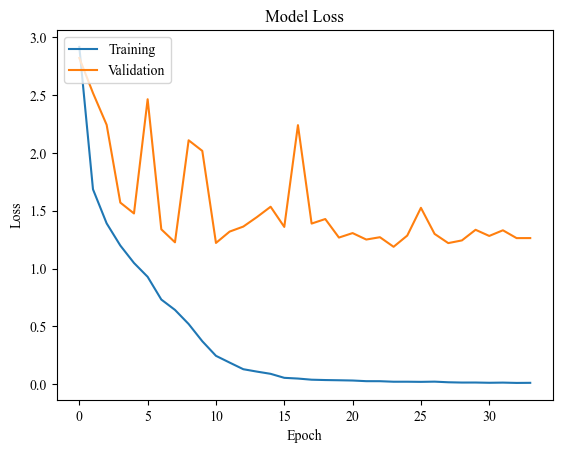

In [82]:
#Plot loss of training vs validation
plt.rcParams["font.family"] = "Times New Roman"
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc = "upper left")
plt.show()

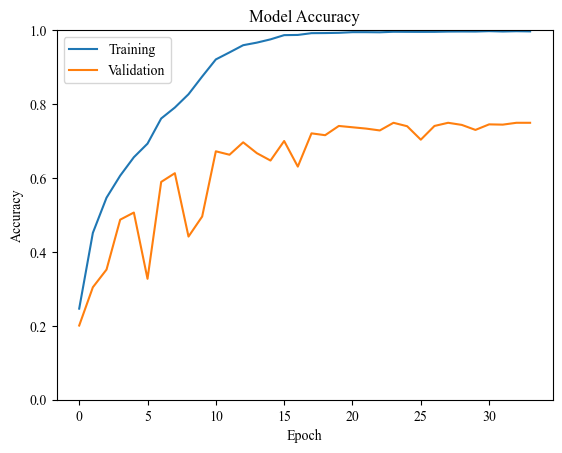

In [83]:
#Plot Training vs Validation Accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.ylim([0, 1])
plt.legend(["Training", "Validation"], loc = "upper left")
plt.show()

In [84]:
#Main Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 511, 385, 8)       608       
                                                                 
 batch_normalization (BatchN  (None, 511, 385, 8)      32        
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 511, 385, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 192, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 251, 188, 16)      3216      
                                                                 
 batch_normalization_1 (Batc  (None, 251, 188, 16)     6

<H1>Precision per Class</H1>

In [91]:
precision_per_class(model, testing_generator)

140/140 [==============================] - 11s 75ms/step
              precision    recall  f1-score   support

     classic       0.93      0.95      0.94       320
     country       0.72      0.77      0.74       320
         edm       0.83      0.84      0.83       320
    flamenco       0.91      0.85      0.88       320
      hiphop       0.76      0.82      0.79       320
       indie       0.73      0.78      0.75       320
        jazz       0.90      0.94      0.92       320
        kpop       0.73      0.60      0.66       320
       latin       0.83      0.85      0.84       320
       metal       0.72      0.73      0.73       320
         pop       0.52      0.53      0.52       320
         rap       0.83      0.77      0.80       320
      reggae       0.93      0.94      0.93       320
        rock       0.62      0.58      0.60       320

    accuracy                           0.78      4480
   macro avg       0.78      0.78      0.78      4480
weighted avg       0.78

140/140 [==============================] - 11s 75ms/step


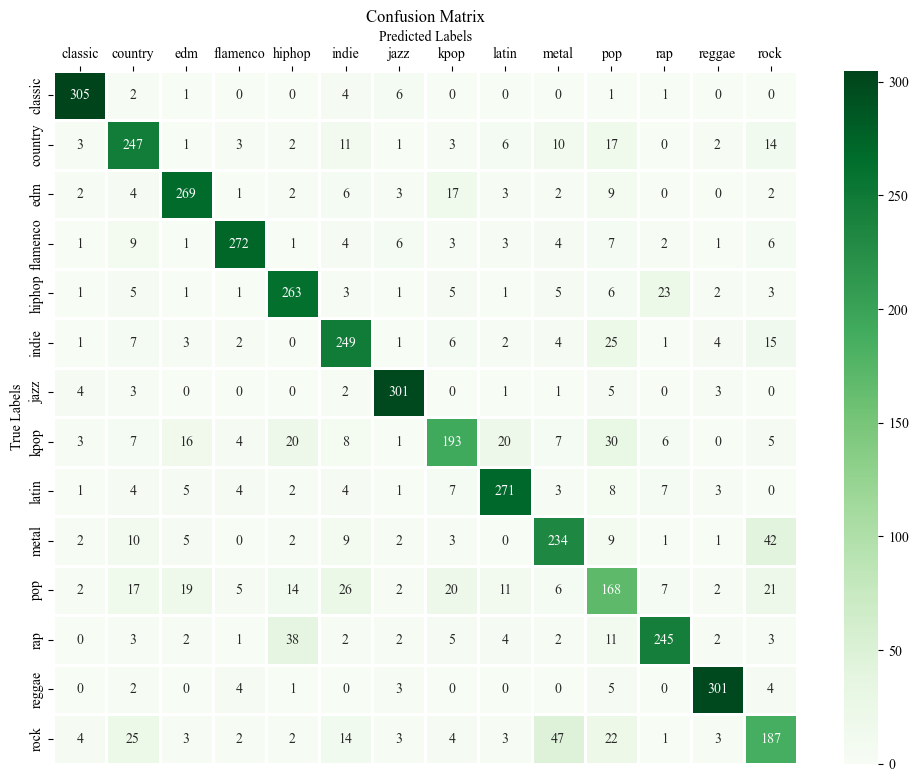

In [92]:
multiclass_confusion_matrix(model, testing_generator)

<H1>Testing Popular Songs</H1>

<Figure size 640x480 with 0 Axes>

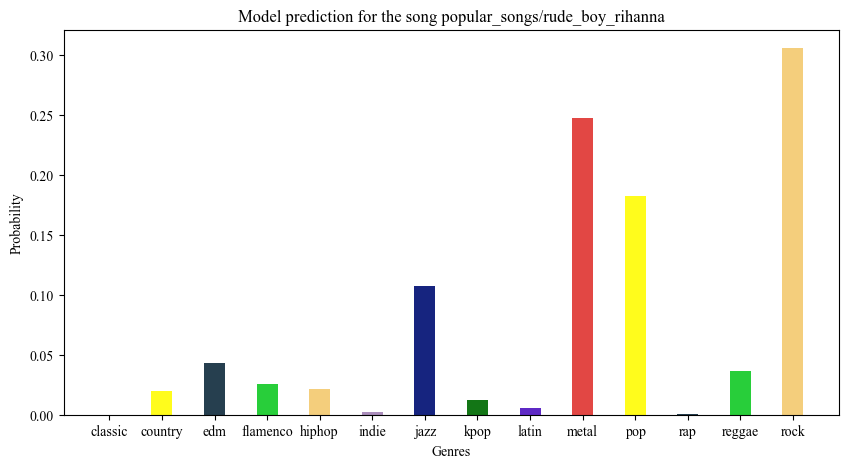

array([0.00000305, 0.01991448, 0.04291478, 0.02524541, 0.02163384,
       0.0021003 , 0.10765203, 0.01246524, 0.00598185, 0.2473582 ,
       0.18191696, 0.00097692, 0.03678963, 0.30546396])

In [53]:
test_song("popular_songs/rude_boy_rihanna.wav", model)

<Figure size 640x480 with 0 Axes>

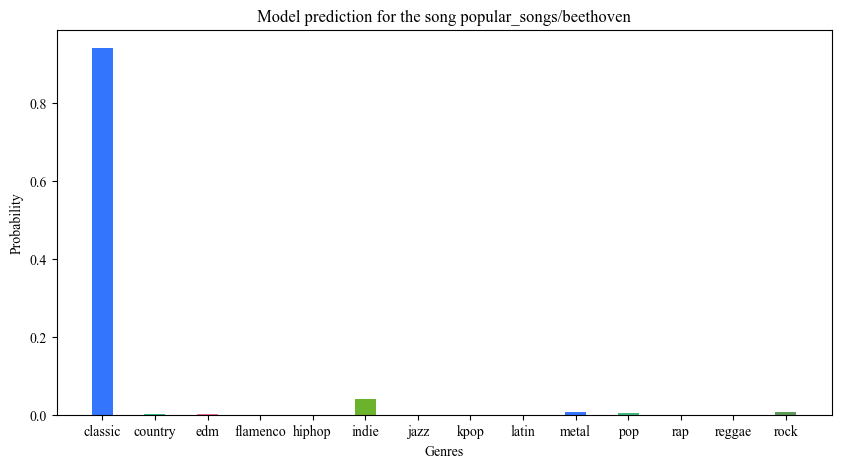

array([0.94105476, 0.00200079, 0.00284359, 0.00001949, 0.0003985 ,
       0.03951033, 0.00056308, 0.00008584, 0.00007422, 0.0074202 ,
       0.00372683, 0.00006291, 0.00001437, 0.00646239])

In [54]:
test_song("popular_songs/beethoven.wav", model)

<Figure size 640x480 with 0 Axes>

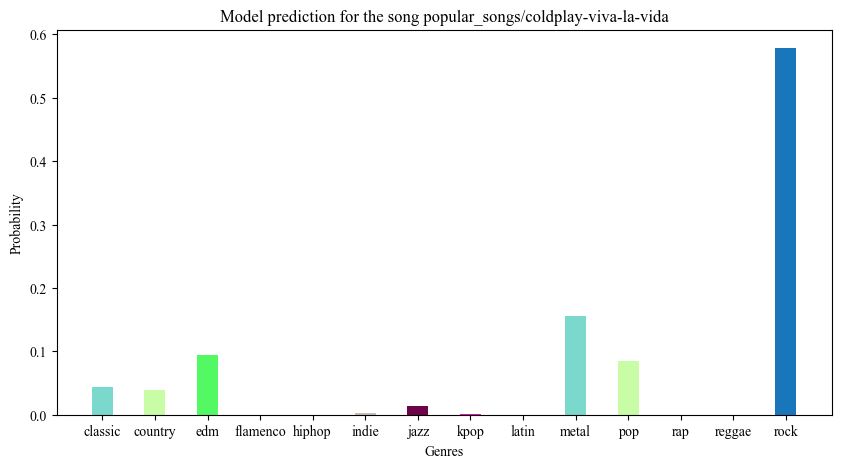

array([0.04363568, 0.0383183 , 0.09443429, 0.00002368, 0.00004113,
       0.00272173, 0.01360832, 0.00045767, 0.00020547, 0.15542716,
       0.0852769 , 0.00000025, 0.00002702, 0.57832243])

In [55]:
test_song("popular_songs/coldplay-viva-la-vida.wav", model)

<Figure size 640x480 with 0 Axes>

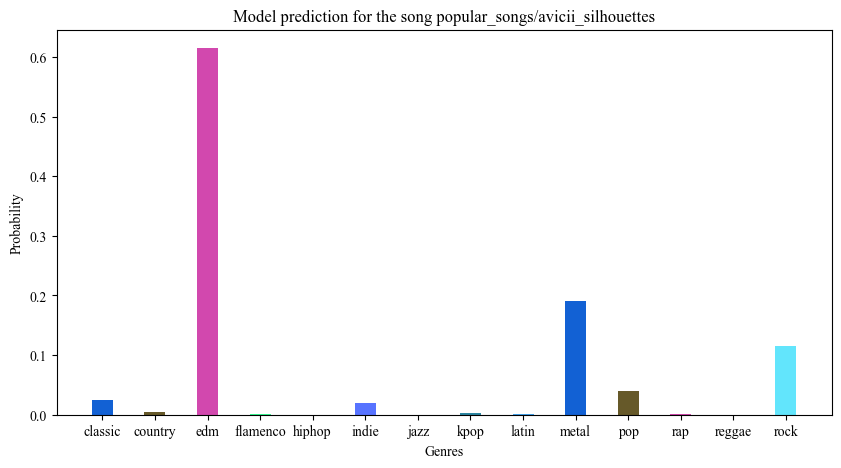

array([0.02517022, 0.00411352, 0.61491535, 0.0004086 , 0.00002263,
       0.01884582, 0.00031594, 0.00293218, 0.00199342, 0.18989808,
       0.03962786, 0.00097025, 0.00000278, 0.11506907])

In [56]:
test_song("popular_songs/avicii_silhouettes.wav", model)

<Figure size 640x480 with 0 Axes>

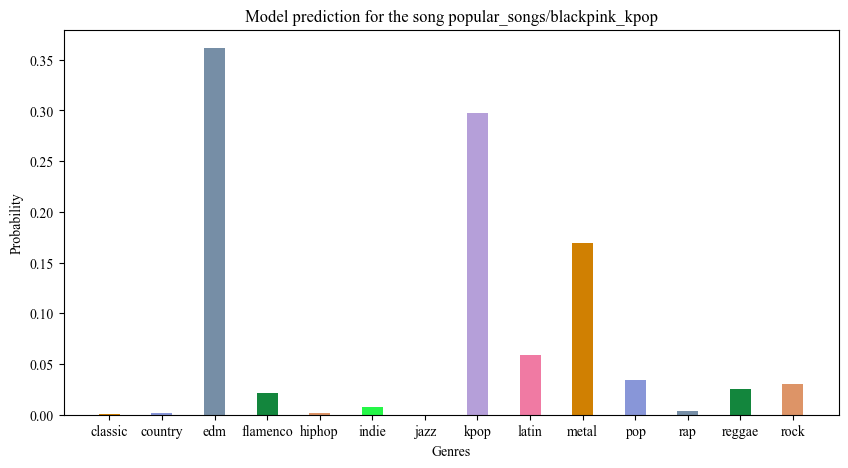

array([0.00025909, 0.00164271, 0.36154521, 0.02135456, 0.00196274,
       0.00769483, 0.00021082, 0.29755172, 0.05905501, 0.16966912,
       0.03472218, 0.00336334, 0.02510383, 0.02994935])

In [57]:
test_song("popular_songs/blackpink_kpop.wav", model)

<Figure size 640x480 with 0 Axes>

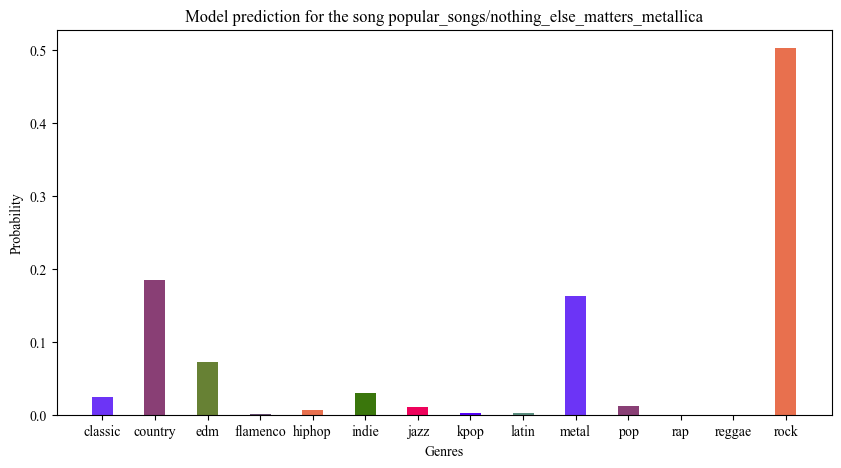

array([0.02396224, 0.18475441, 0.07180672, 0.00034083, 0.00590399,
       0.02932675, 0.0112257 , 0.00234132, 0.00204975, 0.16231864,
       0.011417  , 0.00007006, 0.00000161, 0.50229349])

In [58]:
test_song("popular_songs/nothing_else_matters_metallica.wav", model)

<H1>Results 9-Seconds Dataset</H1>

In [66]:
#Evaluate the Model
score = model.evaluate(testing_generator)

44/44 [==============================] - 3s 70ms/step - loss: 1.3618 - accuracy: 0.7507


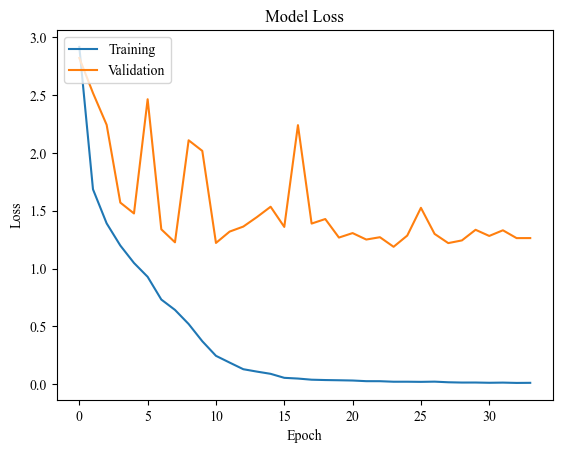

In [67]:
#Plot loss of training vs validation
plt.rcParams["font.family"] = "Times New Roman"
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc = "upper left")
plt.show()

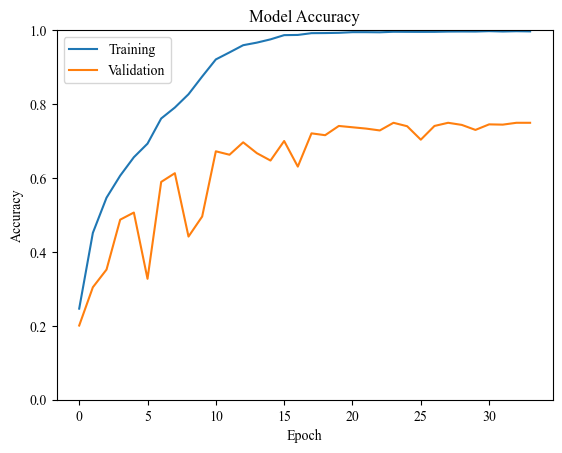

In [68]:
#Plot Training vs Validation Accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.ylim([0, 1])
plt.legend(["Training", "Validation"], loc = "upper left")
plt.show()

In [69]:
#Main Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 511, 385, 8)       608       
                                                                 
 batch_normalization_10 (Bat  (None, 511, 385, 8)      32        
 chNormalization)                                                
                                                                 
 re_lu_10 (ReLU)             (None, 511, 385, 8)       0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 255, 192, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 251, 188, 16)      3216      
                                                                 
 batch_normalization_11 (Bat  (None, 251, 188, 16)    

In [70]:
precision_per_class(model, testing_generator)

44/44 [==============================] - 3s 71ms/step
              precision    recall  f1-score   support

     classic       0.89      0.96      0.92       100
     country       0.68      0.75      0.71       100
         edm       0.82      0.84      0.83       100
    flamenco       0.84      0.82      0.83       100
      hiphop       0.76      0.79      0.77       100
       indie       0.71      0.67      0.69       100
        jazz       0.90      0.89      0.89       100
        kpop       0.72      0.64      0.68       100
       latin       0.81      0.82      0.82       100
       metal       0.71      0.79      0.75       100
         pop       0.36      0.26      0.30       100
         rap       0.74      0.73      0.74       100
      reggae       0.89      0.94      0.91       100
        rock       0.58      0.61      0.60       100

    accuracy                           0.75      1400
   macro avg       0.74      0.75      0.75      1400
weighted avg       0.74   

44/44 [==============================] - 3s 70ms/step


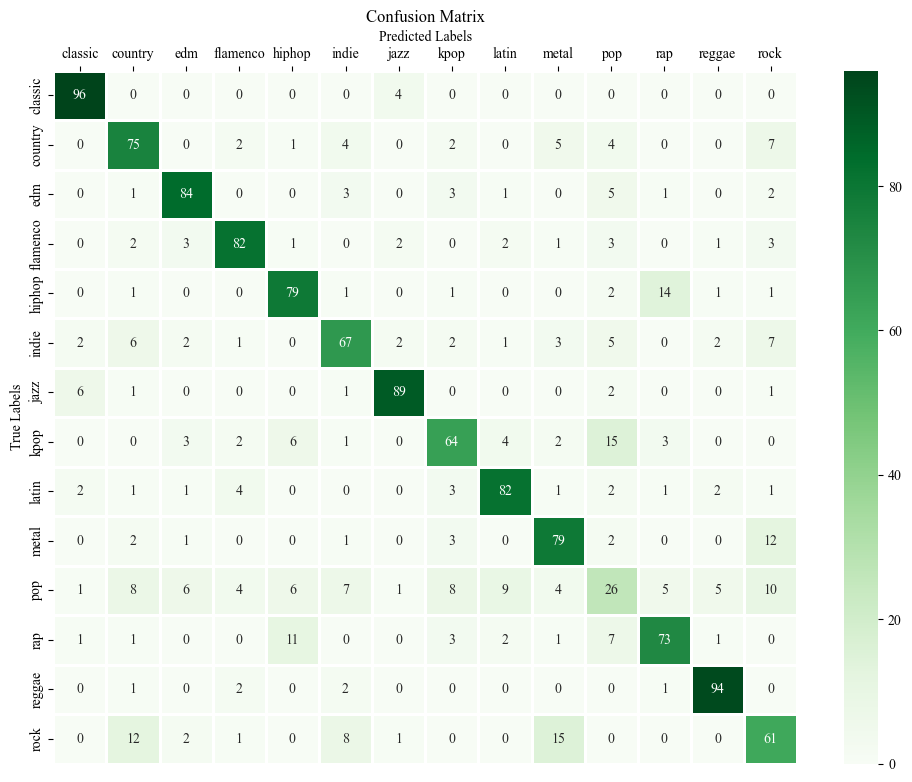

In [71]:
multiclass_confusion_matrix(model, testing_generator)

In [72]:
#We have to update this function process_wav to split into 9-second clips instead of 3
def process_wav(song):
    name, ext = os.path.splitext(song)
    sound = AudioSegment.from_wav(song)
    
    #Stereo to Mono like original dataset
    sound = sound.set_channels(1)
    
    #Change Hz to 22050Hz like original dataset
    sound = sound.set_frame_rate(22050)
    
    sound.export("{0}_resampled.wav".format(name), format = "wav")
    
    song = "{0}_resampled.wav".format(name)
    
    i = 0
    to_return = []
    
    total_duration = len(AudioSegment.from_wav(song))
    
    intervals =  int(total_duration / 9000)
    
    for w in range(0, intervals):
        i = i + 1
        t1 = 9 * (w) * 1000
        t2 = 9 * (w + 1) * 1000
        newAudio = AudioSegment.from_wav(song)
        new = newAudio[t1:t2]
        new.export(str(w) + ".wav", format = "wav")
        to_return.append(str(w) + ".wav")
        
    return to_return, intervals

<Figure size 640x480 with 0 Axes>

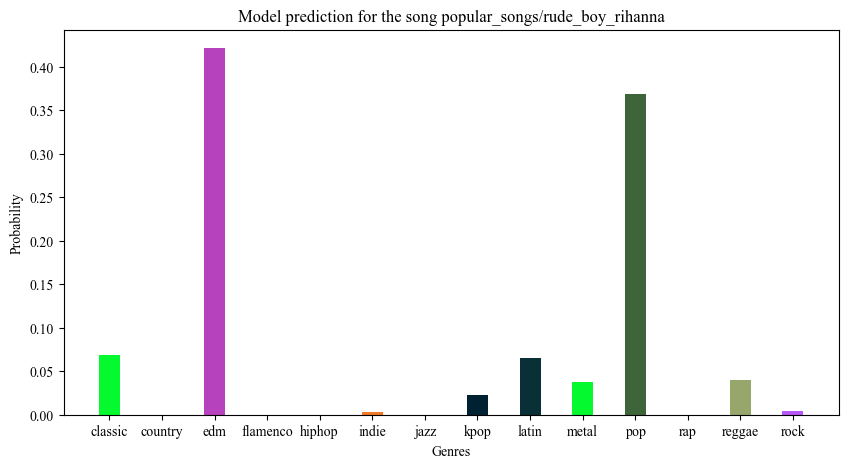

array([0.06909454, 0.00019963, 0.42148998, 0.00002619, 0.00009937,
       0.0031039 , 0.00000035, 0.02222914, 0.06503968, 0.03740867,
       0.36871632, 0.00002538, 0.03981941, 0.00399744])

In [73]:
test_song("popular_songs/rude_boy_rihanna.wav", model)

<Figure size 640x480 with 0 Axes>

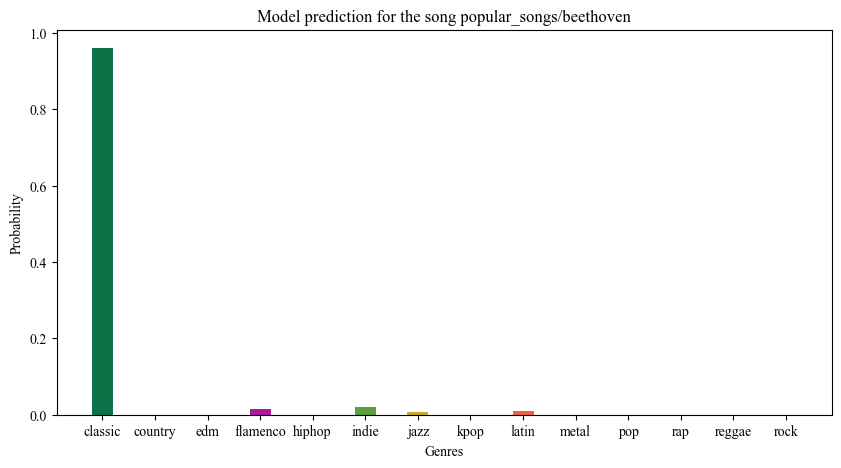

array([0.95997998, 0.00000027, 0.00002102, 0.01398438, 0.00000005,
       0.02095852, 0.00761808, 0.00000189, 0.01019101, 0.00005052,
       0.00000989, 0.00000217, 0.0000009 , 0.00000184])

In [74]:
test_song("popular_songs/beethoven.wav", model)

<Figure size 640x480 with 0 Axes>

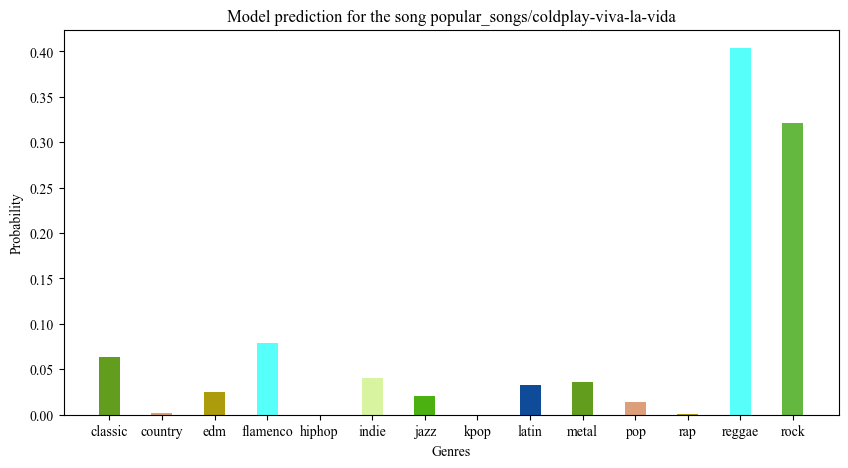

array([0.06369057, 0.00235346, 0.02507421, 0.07893343, 0.00000047,
       0.04014043, 0.02020788, 0.00000041, 0.03323747, 0.0361662 ,
       0.0138501 , 0.00039906, 0.40373674, 0.32067112])

In [75]:
test_song("popular_songs/coldplay-viva-la-vida.wav", model)

<Figure size 640x480 with 0 Axes>

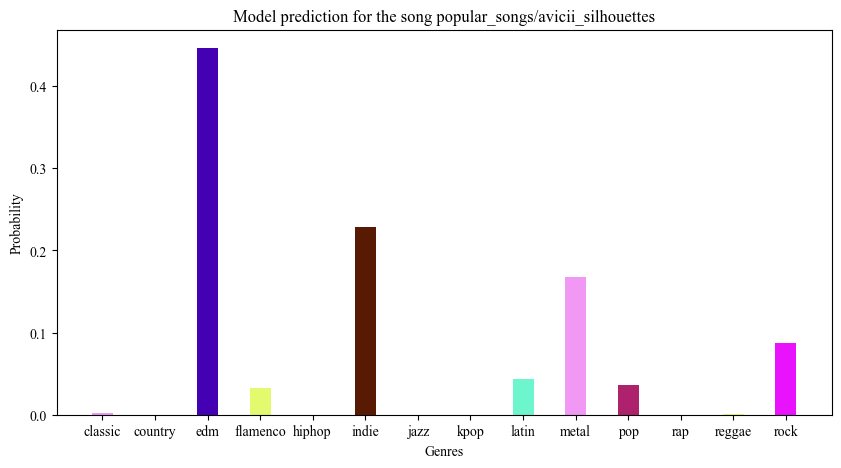

array([0.00202826, 0.00002604, 0.44639473, 0.03252135, 0.00000087,
       0.22879496, 0.00000006, 0.0000078 , 0.04313774, 0.16711441,
       0.03623007, 0.00000908, 0.00037808, 0.08683481])

In [76]:
test_song("popular_songs/avicii_silhouettes.wav", model)

<Figure size 640x480 with 0 Axes>

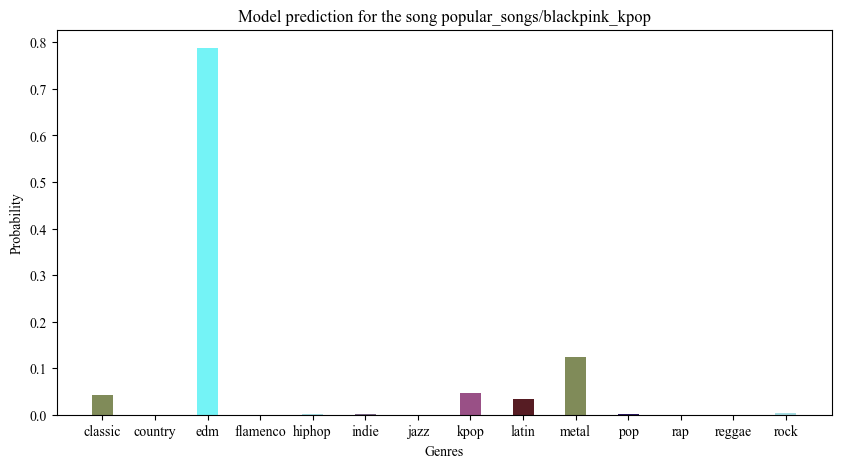

array([0.04337722, 0.00000365, 0.78781723, 0.00002944, 0.00184814,
       0.00177351, 0.00002207, 0.04562086, 0.03423405, 0.12357358,
       0.0018678 , 0.00007786, 0.00000078, 0.00323207])

In [77]:
test_song("popular_songs/blackpink_kpop.wav", model)

<Figure size 640x480 with 0 Axes>

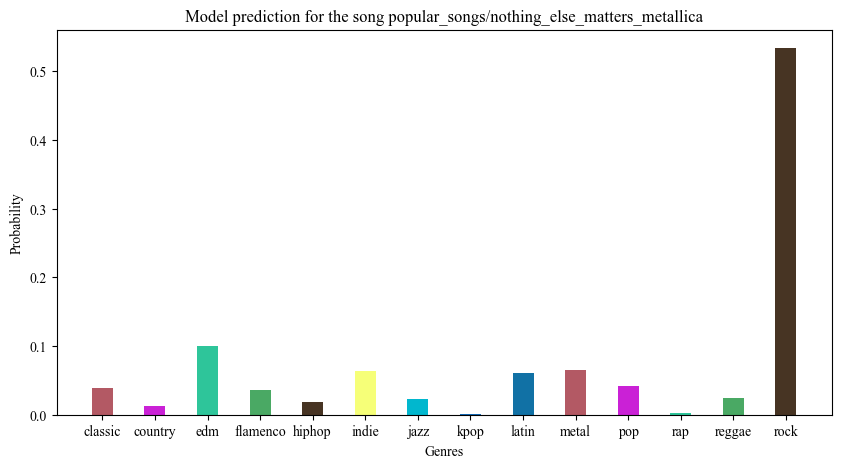

array([0.03873717, 0.01243699, 0.09931514, 0.03660226, 0.01871479,
       0.06402845, 0.02355923, 0.00122972, 0.06106302, 0.06459674,
       0.04232564, 0.00304028, 0.02471872, 0.53344138])

In [78]:
test_song("popular_songs/nothing_else_matters_metallica.wav", model)